Our main argument is that having a counterpart in the tournament is a predictor of success in the tournament. Majority of the teams do not have a counterpart in the tournament, but in every round except the final four, if you have a counterpart in the tournament, your time has a greater than 50% chance of winning your game. Until eventually most of the champions turn out to be teams with coutnerparts

We want to argue that this is a valid factor that is backed up by evidence and is partially explainable. 
We make no extravagent claims such as all teams with counterparts do better, or even teams with counterparts are more likely to make both tournaments. But we do argue if both of your teams (men and womens) make the tournament that year, your team is more likely to win your game in each round than if your team did not have a counterpart in the tournament.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np
import pandas as pd 
from datetime import date, timedelta
from tqdm import tqdm_notebook #gives a progress bar
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#visualizations
!pip install joypy
import joypy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from scipy import stats
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')

# Feature Importance
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBRegressor
import lightgbm as lgb

# This prints out the path (or directory) for each file so I 
#can use that to import it when needed.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2016.csv
/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2018.csv
/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2020.csv
/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2015.csv
/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2019.csv
/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2017.csv
/kaggle/input/march-madness-analytics-2020/MPlayByPlay_Stage2/MPlayers.csv
/kaggle/input/march-madness-analytics-2020/WDataFiles_Stage2/WGameCities.csv
/kaggle/input/march-madness-analytics-2020/WDataFiles_Stage2/Cities.csv
/kaggle/input/march-madness-analytics-2020/WDataFiles_Stage2/WNCAATourneySlots.csv
/kaggle/input/march-madness-analytics-2020/WDataFiles_Stage2/WNCAATourneyCompactResults.csv
/kaggle/input/march-madness-analytics-2020/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv
/kaggle/input/march-madness-analytics-

In [2]:
Mconferences = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/Conferences.csv')
print(Mconferences.shape)
Mconferences.head()

(51, 2)


,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [3]:
#import some data
Season2019 = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MEvents2019.csv')

print(Season2019.shape)
Season2019.head()

(2706968, 17)


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,10442717,2019,1,1104,1380,82,62,0,0,18,1380,10314,made2,jump,0,0,0
1,10442718,2019,1,1104,1380,82,62,0,0,18,1380,10307,assist,NaN,0,0,0
2,10442719,2019,1,1104,1380,82,62,0,0,42,1104,129,made2,jump,0,0,0
3,10442720,2019,1,1104,1380,82,62,0,0,58,1380,10303,turnover,unk,0,0,0
4,10442721,2019,1,1104,1380,82,62,0,0,63,1104,143,made3,unk,0,0,0


In [4]:
men_players = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MPlayers.csv')
men_players.head()

,PlayerID,LastName,FirstName,TeamID
0,1,Albright,Christian,1101
1,2,Cameron,Tobias,1101
2,3,Cobb,Chase,1101
3,4,Cooke,Austin,1101
4,5,Crnic,Jovan,1101


Block of Import data about teams and regular season results

In [5]:
Mregular_season_det = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
Mregular_season_comp = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')

In [6]:
Mregular_season_det.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
87499,2019,132,1153,69,1222,57,N,0,22,50,...,33,11,18,17,16,8,7,2,4,19
87500,2019,132,1209,73,1426,64,N,0,20,50,...,33,11,17,13,28,12,14,5,2,24
87501,2019,132,1277,65,1276,60,N,0,22,55,...,25,10,12,3,26,17,6,5,5,11
87502,2019,132,1387,55,1382,53,N,0,22,59,...,19,8,10,13,30,9,11,2,7,16
87503,2019,132,1463,97,1217,85,H,0,32,53,...,32,19,24,12,15,7,9,1,2,22


In [7]:
Mregular_season_comp.shape

(161552, 8)

In [8]:
Mregular_season_comp.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [9]:
MTourney_comp_results = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
MTourney_det_results = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')

In [10]:
MTourney_comp_results.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0
2250,2019,154,1438,85,1403,77,N,1


## First Exploration

Try to find out if the average score of the team in the regulare season has any correlation to the average number of points scored by that team in the tournament.

We'll need:
* MTourney_comp_results
* MTourney_det_results
* Mregular_season_comp
* Mregular_season_det
* Mteams

In [11]:
MTeams = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeams.csv')

In [12]:
MTeams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020


There are no null values


### Initial

We're going to find the average points per game for each team in each season. We will do this by pairing the winning team ID with the winning team score, and then grouping by Team ID. We can then sort by season

Graph 1: Each team in the tournament on x-axis, and y-axis is their averge score. There are bars for regular season and tournament avg. score for each team (diff. colors)

In [13]:
Mregular_season_comp.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [14]:
Mrg3 = MTourney_comp_results.loc[MTourney_comp_results.Season ==2002]
Mrg3.head(50)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1072,2002,134,1373,81,1108,77,N,0
1073,2002,136,1104,86,1194,78,N,0
1074,2002,136,1112,86,1364,81,N,0
1075,2002,136,1181,84,1457,37,N,0
1076,2002,136,1231,75,1428,56,N,0
1077,2002,136,1242,70,1221,59,N,0
1078,2002,136,1245,69,1329,61,N,0
1079,2002,136,1246,83,1434,68,N,0
1080,2002,136,1281,93,1274,80,N,0
1081,2002,136,1323,82,1150,63,N,0


Function to call for Getting dataset for graph

Need to combine losing team and winnng team names or id's so they can be in one column and the ppg can be in the other column. If they only have one loss that is their ppg in the tournament.

In [15]:
#Function
def avg_wpoints(season_data):
    lim_seas = season_data.loc[season_data.Season >= 2002] #gets data after this year
    
    #gathers the avg ppg for each team in each season
    ls = lim_seas[['Season','WTeamID', 'WScore']].groupby(['Season','WTeamID'])['WScore'].mean().round(3)
    df = pd.DataFrame(ls)    #puts data into pandas dataframe
    dff = df.reset_index().rename(columns = {'WTeamID': 'TeamID'}) 
    return dff

def avg_lpoints(season_data):
    lim_seas = season_data.loc[season_data.Season >= 2002] #gets data after this year
    
    #gathers the avg ppg for each team in each season
    ls = lim_seas[['Season','LTeamID', 'LScore']].groupby(['Season','LTeamID'])['LScore'].mean().round(3)
    df = pd.DataFrame(ls)   #puts data into pandas dataframe
    dff = df.reset_index().rename(columns = {'LTeamID': 'TeamID'}) 
    return dff


In [16]:
Tourney = avg_wpoints(MTourney_comp_results)

In [17]:
Tourney.head()

,Season,TeamID,WScore
0,2002,1104,86.000
1,2002,1112,77.000
2,2002,1143,82.000
3,2002,1153,90.000
4,2002,1163,75.333


In [18]:
L_Tourney = avg_lpoints(MTourney_comp_results)
L_Tourney.head()

,Season,TeamID,LScore
0,2002,1104,58
1,2002,1108,77
2,2002,1112,67
3,2002,1130,57
4,2002,1131,52


In [19]:
# merge
PPG_Tourn = pd.merge(L_Tourney, Tourney, on=['Season','TeamID'], how='left', indicator='FirstRound')

In [20]:
PPG_Tourn.head()

,Season,TeamID,LScore,WScore,FirstRound
0,2002,1104,58,86.0,both
1,2002,1108,77,NaN,left_only
2,2002,1112,67,77.0,both
3,2002,1130,57,NaN,left_only
4,2002,1131,52,NaN,left_only


In [21]:
PPG_Tourn['PPG'] = PPG_Tourn[['LScore', 'WScore']].mean(axis=1)

In [22]:
PPG_Tourn.head()

,Season,TeamID,LScore,WScore,FirstRound,PPG
0,2002,1104,58,86.0,both,72.0
1,2002,1108,77,NaN,left_only,77.0
2,2002,1112,67,77.0,both,72.0
3,2002,1130,57,NaN,left_only,57.0
4,2002,1131,52,NaN,left_only,52.0


Function to Ecode data and print out multiple graphs of ppg

In [23]:
#Econde data by adding another column for every 5 year increment
def add_col(dataset):
    bins = [2002,2006,2011,2016,2019]
    labels=[1,2,3,4]
    dataset['Bands'] = pd.cut(dataset['Season'], bins=bins, labels=labels, include_lowest=True)
    return dataset

In [24]:
T = add_col(Tourney)

In [25]:
T.head()

,Season,TeamID,WScore,Bands
0,2002,1104,86.000,1
1,2002,1112,77.000,1
2,2002,1143,82.000,1
3,2002,1153,90.000,1
4,2002,1163,75.333,1


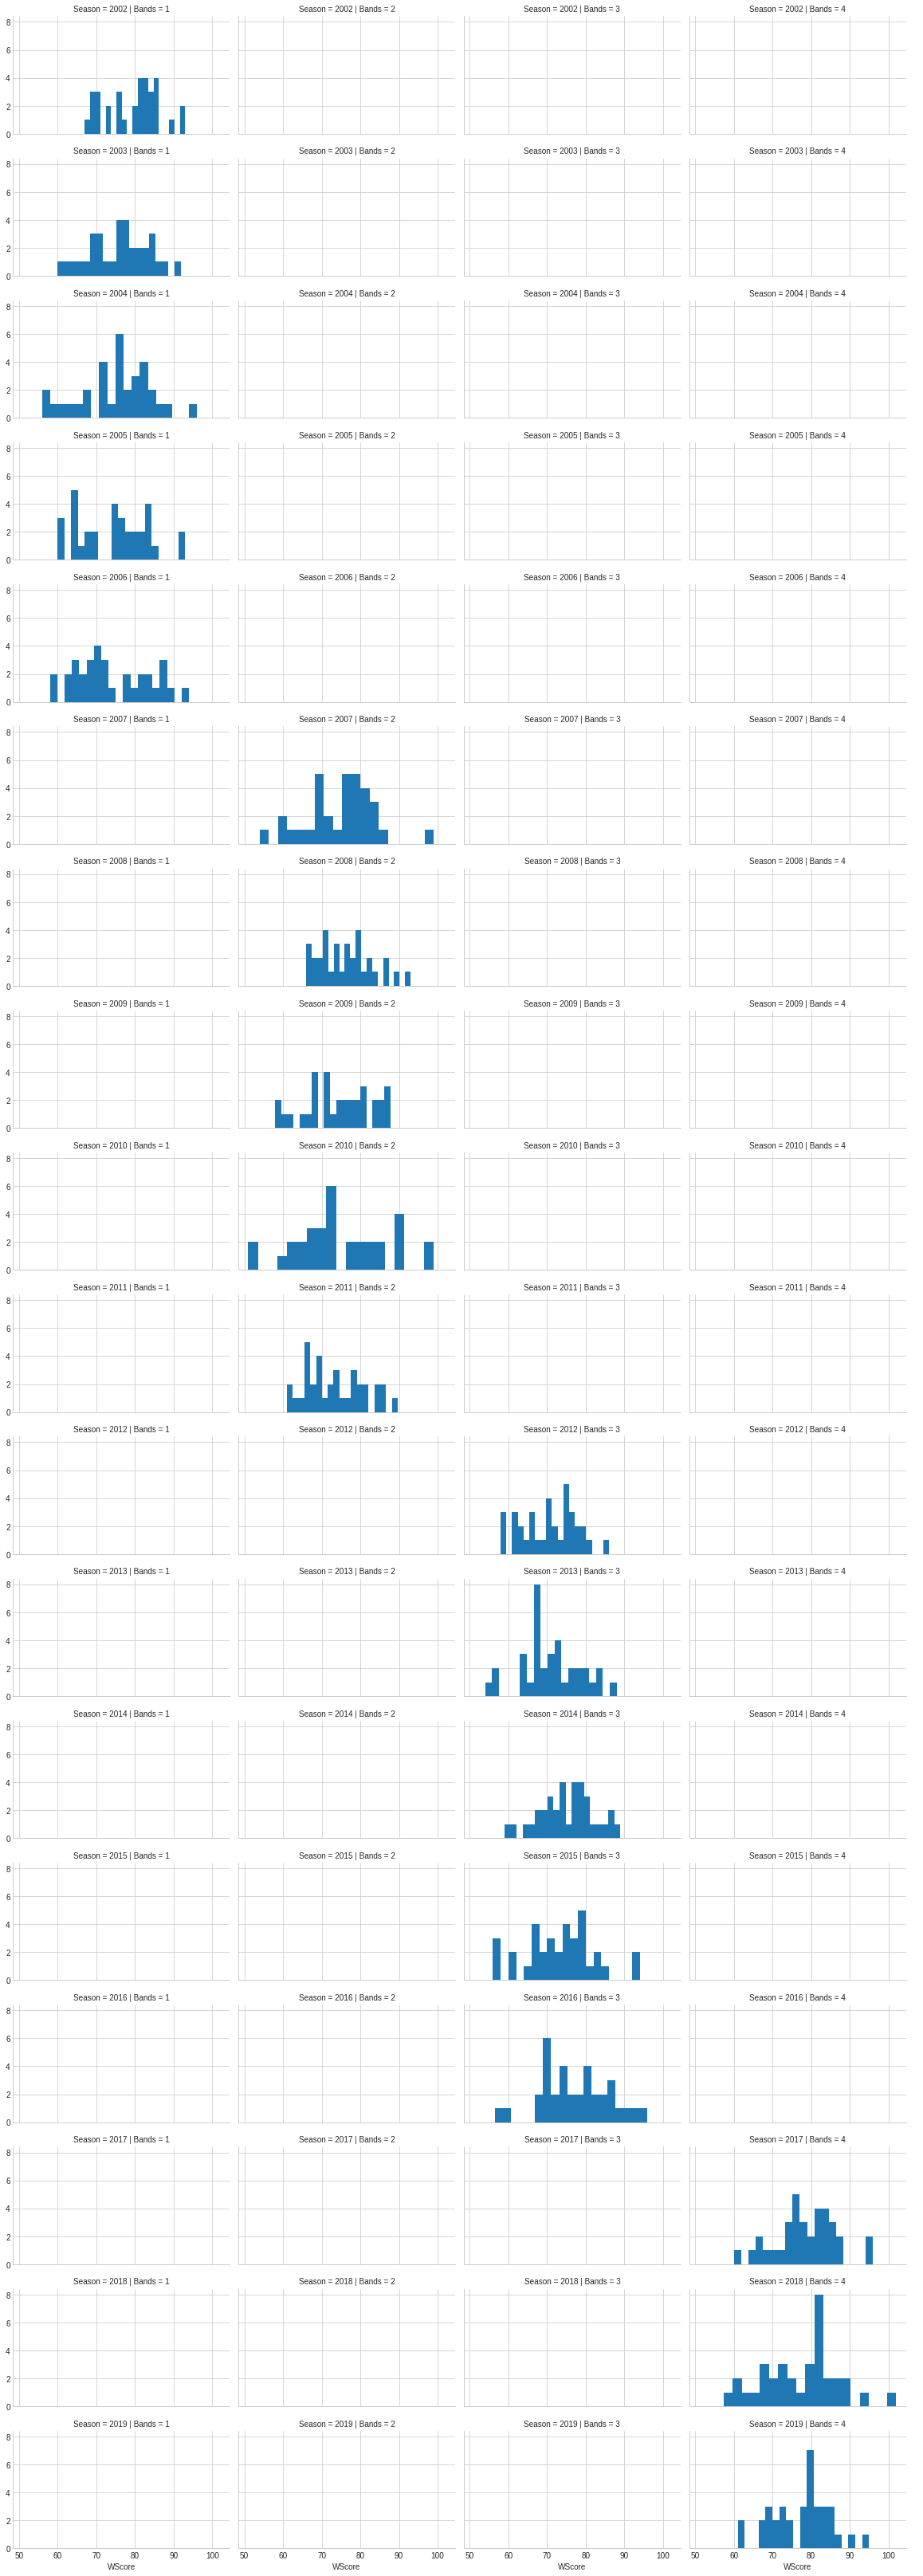

In [26]:
g = sns.FacetGrid(T, col = "Bands", row ="Season", height = 2.5, aspect=1.6)
g.map(plt.hist, "WScore", bins=19)
g.add_legend()


Figure out how to only show the rows (Seasons) that have data in them

## Vizualizations

#### 1. Women and Men


Make some kind of chart (ie. pie) that show teams that are in both men and women's tournament in the same year

## Women's Teams

In [27]:
WTeams = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Womens-Data/WDataFiles_Stage1/WTeams.csv')
WTourney_Seeds = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Womens-Data/WDataFiles_Stage1/WNCAATourneySeeds.csv')

In [28]:
print(WTeams.shape)
WTeams.tail()

(365, 2)


,TeamID,TeamName
360,3463,Yale
361,3464,Youngstown St
362,3465,Cal Baptist
363,3466,North Alabama
364,3467,Merrimack


In [29]:
WTourney_comp = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Womens-Data/WDataFiles_Stage1/WNCAATourneyCompactResults.csv')
WTourney_comp.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


Combine Teams and Tournament Results so the Winning and Losing Teams have names

In [30]:
W_results = WTourney_comp.merge(WTeams, left_on='WTeamID',right_on = 'TeamID',
                                validate='many_to_one').drop('TeamID',axis=1).rename(columns={'TeamName':'WTeamName'})\
                        .merge(WTeams, left_on='LTeamID', right_on = 'TeamID',
                        validate='many_to_one').drop('TeamID',
                                                          axis=1).rename(columns={'TeamName':'LTeamName'})

                                                                             

In [31]:
W_results.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
1381,2008,138,3338,63,3461,58,N,0,Pittsburgh,Wyoming
1382,2014,138,3143,64,3200,63,N,0,California,Fordham
1383,2019,138,3393,70,3200,49,H,0,Syracuse,Fordham
1384,2011,139,3274,80,3205,62,N,0,Miami FL,Gardner Webb
1385,2017,137,3333,56,3253,55,H,0,Oregon St,Long Beach St


We're going to get number of wins per team in each season, ppg per team, and whether that women's team has a men's counterpart also in the tournament

In [32]:
# Get number of wins in tournament per team
def Wppg_wins(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','WTeamName', 'WScore']].groupby(['Season','WTeamName'])['WScore'].mean().round(3)
    df = pd.DataFrame(ls) #puts data into pandas dataframe
    df['Num_wins'] = season_data.groupby('Season').WTeamName.value_counts()
    dff = df.reset_index().rename(columns = {'WTeamName': 'TeamName'}) 
    return dff

def Wppg_loss(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','LTeamName', 'LScore']].groupby(['Season','LTeamName'])['LScore'].mean().round(3)
    df = pd.DataFrame(ls)   #puts data into pandas dataframe
    dff = df.reset_index().rename(columns = {'LTeamName': 'TeamName'}) 
    return dff


In [33]:
Wom_games = Wppg_wins(W_results)

In [34]:
Wom_games.head()

,Season,TeamName,WScore,Num_wins
0,1998,Alabama,84.5,2
1,1998,Arizona,84.5,2
2,1998,Arkansas,78.5,4
3,1998,Clemson,60.0,1
4,1998,Colorado St,81.0,1


In [35]:
Wom_g = Wppg_loss(W_results)
Wom_g.head()

,Season,TeamName,LScore
0,1998,Alabama,57
1,1998,Arizona,57
2,1998,Arkansas,58
3,1998,Clemson,52
4,1998,Colorado St,63


In [36]:
# merge
Womens_Tournament = pd.merge(Wom_g, Wom_games, on=['Season','TeamName'], how='outer', indicator='FirstRound', sort='Season')

In [37]:
Womens_Tournament.head()

,Season,TeamName,LScore,WScore,Num_wins,FirstRound
0,1998,Alabama,57.0,84.5,2.0,both
1,1998,Arizona,57.0,84.5,2.0,both
2,1998,Arkansas,58.0,78.5,4.0,both
3,1998,Clemson,52.0,60.0,1.0,both
4,1998,Colorado St,63.0,81.0,1.0,both


In [38]:
# Create PPG column
Womens_Tournament['PPG'] = Womens_Tournament[['LScore', 'WScore']].mean(axis=1)

# fill Num_wins NaN with 0
# drop FirstRound
Womens_Tournament = Womens_Tournament.drop(['LScore', 'WScore','FirstRound'], axis=1)
Womens_Tournament['Num_wins'].fillna(0, inplace=True)

Womens_Tournament.head()

,Season,TeamName,Num_wins,PPG
0,1998,Alabama,2.0,70.75
1,1998,Arizona,2.0,70.75
2,1998,Arkansas,4.0,68.25
3,1998,Clemson,1.0,56.00
4,1998,Colorado St,1.0,72.00


#### PPG Column for Regular Season

Use dataset Womens regular season compact results
Then choose only the teams that have the corresponding team name and season as the ones in the tournament. [loc]
Then use the formula in the first part to find the PPG for each team

In [39]:
WReg_seas_comp = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Womens-Data/WDataFiles_Stage1/WRegularSeasonCompactResults.csv')
WReg_seas_comp.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [40]:
W_ppg = WReg_seas_comp.merge(WTeams, left_on='WTeamID',right_on = 'TeamID',
                                validate='many_to_one').drop('TeamID',axis=1).rename(columns={'TeamName':'WTeamName'})\
                        .merge(WTeams, left_on='LTeamID', right_on = 'TeamID',
                        validate='many_to_one').drop('TeamID',
                                                          axis=1).rename(columns={'TeamName':'LTeamName'})

                                                                             




# Get number of wins in tournament per team
def Wppg_wins(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','WTeamName', 'WScore']].groupby(['Season','WTeamName'])['WScore'].mean().round(3)
    df = pd.DataFrame(ls) #puts data into pandas dataframe
    df['Num_wins'] = season_data.groupby('Season').WTeamName.value_counts()
    dff = df.reset_index().rename(columns = {'WTeamName': 'TeamName'}) 
    return dff

def Wppg_loss(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','LTeamName', 'LScore']].groupby(['Season','LTeamName'])['LScore'].mean().round(3)
    df = pd.DataFrame(ls)   #puts data into pandas dataframe
    dff = df.reset_index().rename(columns = {'LTeamName': 'TeamName'}) 
    return dff

# Run for winning and losing games
Wom_ppgw = Wppg_wins(W_ppg)
Wom_ppgl = Wppg_loss(W_ppg)


# merge
Womens_Season = pd.merge(Wom_ppgl, Wom_ppgw, on=['Season','TeamName'], how='outer', indicator='FirstRound', sort='Season')


# Create PPG column
Womens_Season['PPG'] = Womens_Season[['LScore', 'WScore']].mean(axis=1)

# fill Num_wins NaN with 0
# drop FirstRound
Womens_Season = Womens_Season.drop(['LScore', 'WScore','FirstRound'], axis=1)
Womens_Season['Num_wins'].fillna(0, inplace=True)

Womens_Season.head()

,Season,TeamName,Num_wins,PPG
0,1998,Air Force,4.0,60.6750
1,1998,Akron,11.0,70.6615
2,1998,Alabama,21.0,75.0080
3,1998,Alabama St,6.0,63.9170
4,1998,Alcorn St,12.0,67.5075


In [41]:
Womens_Season.shape

(7355, 4)

In [42]:
Womens_Tournament.shape

(1408, 4)

In [43]:
# merge
Womens_ppg = pd.merge(Womens_Tournament, Womens_Season, on=['Season','TeamName'], how='outer', indicator='Tour', sort='Season')

In [44]:
Womens_ppg.head()

,Season,TeamName,Num_wins_x,PPG_x,Num_wins_y,PPG_y,Tour
0,1998,Air Force,NaN,NaN,4.0,60.6750,right_only
1,1998,Akron,NaN,NaN,11.0,70.6615,right_only
2,1998,Alabama,2.0,70.75,21.0,75.0080,both
3,1998,Alabama St,NaN,NaN,6.0,63.9170,right_only
4,1998,Alcorn St,NaN,NaN,12.0,67.5075,right_only


In [45]:
Womens_Tournament = Womens_ppg.loc[Womens_ppg['Tour'] == "both"]

In [46]:
Womens_Tournament.head()

,Season,TeamName,Num_wins_x,PPG_x,Num_wins_y,PPG_y,Tour
2,1998,Alabama,2.0,70.75,21.0,75.0080,both
7,1998,Arizona,2.0,70.75,21.0,74.6665,both
9,1998,Arkansas,4.0,68.25,17.0,72.5350,both
41,1998,Clemson,1.0,56.00,22.0,67.0795,both
47,1998,Colorado St,1.0,72.00,21.0,76.3620,both


In [47]:
Womens_Tournament = Womens_Tournament.drop(['Num_wins_y', 'PPG_x', 'Tour'], axis=1).rename(columns={'Num_wins_x': 'Num_wins', 'PPG_y': 'PPG_seas'})

In [48]:
Womens_Tournament.head()

,Season,TeamName,Num_wins,PPG_seas
2,1998,Alabama,2.0,75.0080
7,1998,Arizona,2.0,74.6665
9,1998,Arkansas,4.0,72.5350
41,1998,Clemson,1.0,67.0795
47,1998,Colorado St,1.0,76.3620


Add Tournament Seed Column

In [49]:
WSeeds = WTourney_Seeds.merge(WTeams, on= 'TeamID', how='left', validate='many_to_one')
WSeeds = WSeeds.drop('TeamID', axis=1)
# merge the seed and tournament data
Womens_Tournament = pd.merge(Womens_Tournament, WSeeds, on=['Season','TeamName'], how='left' , sort='Season')

In [50]:
# Make region and seed into separate columns
Womens_Tournament['Region'] = Womens_Tournament['Seed'].apply(lambda x: x[0][:1])
Womens_Tournament['Seed'] = Womens_Tournament['Seed'].apply(lambda x: int(x[1:3]))

In [51]:
Womens_Tournament.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region
0,1998,Alabama,2.0,75.0080,2,X
1,1998,Arizona,2.0,74.6665,3,W
2,1998,Arkansas,4.0,72.5350,9,Z
3,1998,Clemson,1.0,67.0795,6,X
4,1998,Colorado St,1.0,76.3620,12,X


In [52]:
# Make a new column where seeds are mapped into four categories
# Map by rank 1-4: Top, 5-8: Inter, etc.
Womens_Tournament['Ranking_Tier'] = Womens_Tournament['Seed'].map({1: 'Top',
                                                                   2: 'Top',
                                                                   3: 'Top',
                                                                   4: 'Top',
                                                                   5: 'Second',
                                                                   6: 'Second',
                                                                   7: 'Second', 
                                                                   8: 'Second',
                                                                   9: 'Intermediate',
                                                                   10: 'Intermediate',
                                                                   11: 'Intermediate',
                                                                   12: 'Intermediate',
                                                                   13: 'Bottom',
                                                                   14: 'Bottom',
                                                                   15: 'Bottom',
                                                                   16: 'Bottom'
                                                                  })
                                                      

**Add Both Column**

Now we want to add a column that says YES(1) if men's counterpart was in tournament the same year, and NO(0) if it was not. 

In [53]:
# Import data on men's teams in tournament
MTourney_Seeds = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
MTourney_Seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [54]:
MTeams = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeams.csv')
MTeams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020


In [55]:
# Add team names and rearange the columns
Men_Teams = MTourney_Seeds.merge(MTeams, left_on='TeamID',right_on = 'TeamID',
                                validate='many_to_one').drop(['TeamID','FirstD1Season', 'LastD1Season'],axis=1)

Men_Teams = Men_Teams[['Season', 'TeamName', 'Seed']]

In [56]:
# Cut off at 1998 because thats when the women's data starts
Men_Teams = Men_Teams.loc[Men_Teams.Season >= 1998]
Men_Teams = Men_Teams.drop('Seed', axis=1)
Men_Teams.head()

,Season,TeamName
12,2001,Georgetown
13,2006,Georgetown
14,2007,Georgetown
15,2008,Georgetown
16,2010,Georgetown


In [57]:
Wom_w_Men = pd.merge(Womens_Tournament, Men_Teams, on=['Season','TeamName'], how='left', indicator='Both')
Wom_w_Men['Both'] = np.where(Wom_w_Men.Both == 'both', 1, 0)

In [58]:
Wom_w_Men.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier,Both
0,1998,Alabama,2.0,75.0080,2,X,Top,0
1,1998,Arizona,2.0,74.6665,3,W,Top,1
2,1998,Arkansas,4.0,72.5350,9,Z,Intermediate,1
3,1998,Clemson,1.0,67.0795,6,X,Second,1
4,1998,Colorado St,1.0,76.3620,12,X,Intermediate,0


We have done it
Our Wom_w_Men is the dataset we will use for the color coated scatter plot. 

## If Men Counterpart in Men's NCAA Tournament

FIND SOME KIND OF OTHER GRAPH TO GRAPH THIS PHENOMENON

We are going to graph the teams that won at least one game in a scatter plot by year. They will be color coated by whether the women's team also has a men's team in the NCAA Tournament

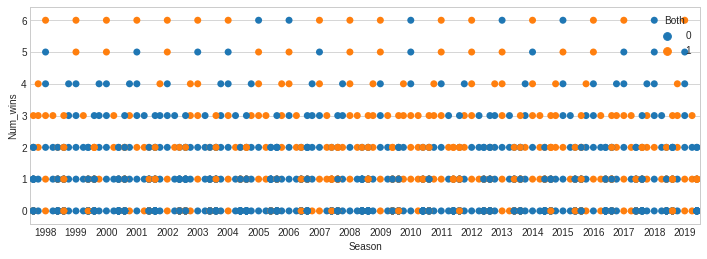

In [59]:
fig, ax = plt.subplots(figsize=(12,4))
sns.swarmplot(ax=ax, x= Wom_w_Men['Season'],
             y = Wom_w_Men['Num_wins'], hue = Wom_w_Men['Both'], size=7)

So we can see that at the top, the team that won the women's tournament had a team in the Men's Tournament 72% of the time. The team that they beat was also more likely to have a team in the Men's tournament.

As we move down to the teams that lost in the 2nd and 3rd rounds of the tournament, it looks like they were more likley to not have a team in the Men's Tournament.

To really make sure the data is good, we need to look at all of the teams that lost in the first round and see if they are more likley to not have a team in the Men's Tournament. 

# Men's Teams

Make dataset that has men's teams that won and lost in the first round of each year.

We will need:
* Men tournament compact
* Men season compact
* Men Seeds
* Men's Teams
* Women's Seeds
* Women's Teams

In [60]:
#import data
MTourney_comp = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
MReg_seas_comp = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
MSeeds = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
MTeams = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeams.csv')
WTeams = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Womens-Data/WDataFiles_Stage1/WTeams.csv')
WSeeds = pd.read_csv('/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020DataFiles/2020-Womens-Data/WDataFiles_Stage1/WNCAATourneySeeds.csv')

In [61]:
# add team names to the dataset
M_results = MTourney_comp.merge(MTeams, left_on='WTeamID',right_on = 'TeamID',
                                validate='many_to_one').drop('TeamID',axis=1).rename(columns={'TeamName':'WTeamName'})\
                        .merge(MTeams, left_on='LTeamID', right_on = 'TeamID',
                              validate='many_to_one').drop('TeamID',
                                                          axis=1).rename(columns={'TeamName':'LTeamName'})

                                                                             

In [62]:
M_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,FirstD1Season_x,LastD1Season_x,LTeamName,FirstD1Season_y,LastD1Season_y
0,1985,136,1116,63,1234,54,N,0,Arkansas,1985,2020,Iowa,1985,2020
1,1997,138,1246,75,1234,69,N,0,Kentucky,1985,2020,Iowa,1985,2020
2,2001,138,1246,92,1234,79,N,0,Kentucky,1985,2020,Iowa,1985,2020
3,1987,146,1424,84,1234,81,N,0,UNLV,1985,2020,Iowa,1985,2020
4,1991,138,1181,85,1234,70,N,0,Duke,1985,2020,Iowa,1985,2020


In [63]:
# add number of wins and mean score columns
def Mppg_wins(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','WTeamName', 'WScore']].groupby(['Season','WTeamName'])['WScore'].mean().round(3)
    df = pd.DataFrame(ls) #puts data into pandas dataframe
    df['Num_wins'] = season_data.groupby('Season').WTeamName.value_counts()
    dff = df.reset_index().rename(columns = {'WTeamName': 'TeamName'}) 
    return dff

def Mppg_loss(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','LTeamName', 'LScore']].groupby(['Season','LTeamName'])['LScore'].mean().round(3)
    df = pd.DataFrame(ls)   #puts data into pandas dataframe
    dff = df.reset_index().rename(columns = {'LTeamName': 'TeamName'}) 
    return dff

In [64]:
Men_gw = Mppg_wins(M_results)
Men_gl = Mppg_loss(M_results)

In [65]:
# merge
Mens_Tournament = pd.merge(Men_gw, Men_gl, on=['Season','TeamName'], how='outer', indicator='FirstRound', sort='Season')

In [66]:
Mens_Tournament.head()

,Season,TeamName,WScore,Num_wins,LScore,FirstRound
0,1985,Alabama,56.5,2.0,55.0,both
1,1985,Arizona,NaN,NaN,41.0,right_only
2,1985,Arkansas,63.0,1.0,65.0,both
3,1985,Auburn,62.5,2.0,56.0,both
4,1985,Boston College,64.5,2.0,57.0,both


In [67]:
#Must be in year 1998 or later because thats when women's data starts
Mens_Tournament = Mens_Tournament.loc[Mens_Tournament.Season >= 1998]

# Create PPG column
Mens_Tournament['PPG'] = Mens_Tournament[['LScore', 'WScore']].mean(axis=1)
Mens_Tournament.head()

,Season,TeamName,WScore,Num_wins,LScore,FirstRound,PPG
832,1998,Arizona,89.333,3.0,51.0,both,70.1665
833,1998,Arkansas,74.000,1.0,69.0,both,71.5000
834,1998,Butler,NaN,NaN,62.0,right_only,62.0000
835,1998,Charlotte,77.000,1.0,83.0,both,80.0000
836,1998,Cincinnati,65.000,1.0,74.0,both,69.5000


In [68]:
# fill Num_wins NaN with 0
# drop FirstRound
Mens_Tournament = Mens_Tournament.drop(['LScore', 'WScore','FirstRound'], axis=1)
Mens_Tournament['Num_wins'].fillna(0, inplace=True)

In [69]:
Mens_Tournament.head()

,Season,TeamName,Num_wins,PPG
832,1998,Arizona,3.0,70.1665
833,1998,Arkansas,1.0,71.5000
834,1998,Butler,0.0,62.0000
835,1998,Charlotte,1.0,80.0000
836,1998,Cincinnati,1.0,69.5000


Add Season PPG

In [70]:
# Take only men's teams after 1998
MReg_seas_comp = MReg_seas_comp.loc[MReg_seas_comp['Season'] >= 1998]

In [71]:
# Get Regular Season PPG
# add team names to the dataset
M_seas_results = MReg_seas_comp.merge(MTeams, left_on='WTeamID',right_on = 'TeamID',
                                validate='many_to_one').drop('TeamID',axis=1).rename(columns={'TeamName':'WTeamName'})\
                        .merge(MTeams, left_on='LTeamID', right_on = 'TeamID',
                              validate='many_to_one').drop('TeamID',
                                                          axis=1).rename(columns={'TeamName':'LTeamName'})

                                                                             


# add number of wins and mean score columns
def Mppg_wins(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','WTeamName', 'WScore']].groupby(['Season','WTeamName'])['WScore'].mean().round(3)
    df = pd.DataFrame(ls) #puts data into pandas dataframe
    df['Num_wins'] = season_data.groupby('Season').WTeamName.value_counts()
    dff = df.reset_index().rename(columns = {'WTeamName': 'TeamName'}) 
    return dff

def Mppg_loss(season_data):
    #gathers the avg ppg for each team in each season
    ls = season_data[['Season','LTeamName', 'LScore']].groupby(['Season','LTeamName'])['LScore'].mean().round(3)
    df = pd.DataFrame(ls)   #puts data into pandas dataframe
    dff = df.reset_index().rename(columns = {'LTeamName': 'TeamName'}) 
    return dff

Men_ppgw = Mppg_wins(M_seas_results)
Men_ppgl = Mppg_loss(M_seas_results)

# merge
Mens_Season = pd.merge(Men_ppgw, Men_ppgl, on=['Season','TeamName'], how='outer', indicator='FirstRound', sort='Season')

# Create PPG column
Mens_Season['PPG'] = Mens_Season[['LScore', 'WScore']].mean(axis=1)

# fill Num_wins NaN with 0
# drop FirstRound
Mens_Season = Mens_Season.drop(['LScore', 'WScore','FirstRound'], axis=1)
Mens_Season['Num_wins'].fillna(0, inplace=True)

Mens_Season.head()

,Season,TeamName,Num_wins,PPG
0,1998,Air Force,5.0,66.9690
1,1998,Akron,16.0,74.3875
2,1998,Alabama,15.0,69.6330
3,1998,Alabama St,8.0,71.4375
4,1998,Alcorn St,8.0,74.5290


In [72]:
# merge
Mens_ppg = pd.merge(Mens_Tournament, Mens_Season, on=['Season','TeamName'], how='outer', indicator='Tour', sort='Season')

Mens_Tournament = Mens_ppg.loc[Mens_ppg['Tour'] == "both"]

Mens_Tournament = Mens_Tournament.drop(['Num_wins_y', 'PPG_x', 'Tour'], axis=1).rename(columns={'Num_wins_x': 'Num_wins', 'PPG_y': 'PPG_seas'})

Mens_Tournament.head()

,Season,TeamName,Num_wins,PPG_seas
7,1998,Arizona,3.0,89.4490
10,1998,Arkansas,1.0,79.6460
27,1998,Butler,0.0,64.5945
39,1998,Charlotte,1.0,72.1395
42,1998,Cincinnati,1.0,72.8155


Add Seed

In [73]:
MSeeds = MSeeds.merge(MTeams, on= 'TeamID', how='left', validate='many_to_one')
MSeeds = MSeeds.drop('TeamID', axis=1)
# merge the seed and tournament data
Mens_Tournament = pd.merge(Mens_Tournament, MSeeds, on=['Season','TeamName'], how='left' , sort='Season')
# Drop unneeded columns
Mens_Tournament = Mens_Tournament.drop(['FirstD1Season', 'LastD1Season'], axis=1)

In [74]:
# Make region and seed into separate columns
Mens_Tournament['Region'] = Mens_Tournament['Seed'].apply(lambda x: x[0][:1])
Mens_Tournament['Seed'] = Mens_Tournament['Seed'].apply(lambda x: int(x[1:3]))

In [75]:
Mens_Tournament['Ranking_Tier'] = Mens_Tournament['Seed'].map({1: 'Top',
                                                                   2: 'Top',
                                                                   3: 'Top',
                                                                   4: 'Top',
                                                                   5: 'Second',
                                                                   6: 'Second',
                                                                   7: 'Second', 
                                                                   8: 'Second',
                                                                   9: 'Intermediate',
                                                                   10: 'Intermediate',
                                                                   11: 'Intermediate',
                                                                   12: 'Intermediate',
                                                                   13: 'Bottom',
                                                                   14: 'Bottom',
                                                                   15: 'Bottom',
                                                                   16: 'Bottom'
                                                                  })
                                                      

In [76]:
Mens_Tournament.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier
0,1998,Arizona,3.0,89.4490,1,X,Top
1,1998,Arkansas,1.0,79.6460,6,X,Second
2,1998,Butler,0.0,64.5945,13,Z,Bottom
3,1998,Charlotte,1.0,72.1395,8,W,Second
4,1998,Cincinnati,1.0,72.8155,2,X,Top


Add both Column to dataset

In [77]:
# Get women's teams
# Add team names and rearange the columns
Women_Teams = WSeeds.merge(WTeams, left_on='TeamID',right_on = 'TeamID',
                                validate='many_to_one').drop(['TeamID'],axis=1)

Women_Teams = Women_Teams[['Season', 'TeamName', 'Seed']]

In [78]:
Women_Teams = Women_Teams.drop('Seed', axis=1)
Women_Teams.head()

,Season,TeamName
0,1998,Old Dominion
1,1999,Old Dominion
2,2000,Old Dominion
3,2001,Old Dominion
4,2002,Old Dominion


In [79]:
# Combining Data
Men_w_Wom = pd.merge(Mens_Tournament, Women_Teams, on=['Season','TeamName'], how='left', indicator='Both')
Men_w_Wom['Both'] = np.where(Men_w_Wom.Both == 'both', 1, 0)

In [80]:
Men_w_Wom.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier,Both
0,1998,Arizona,3.0,89.4490,1,X,Top,1
1,1998,Arkansas,1.0,79.6460,6,X,Second,1
2,1998,Butler,0.0,64.5945,13,Z,Bottom,0
3,1998,Charlotte,1.0,72.1395,8,W,Second,0
4,1998,Cincinnati,1.0,72.8155,2,X,Top,0


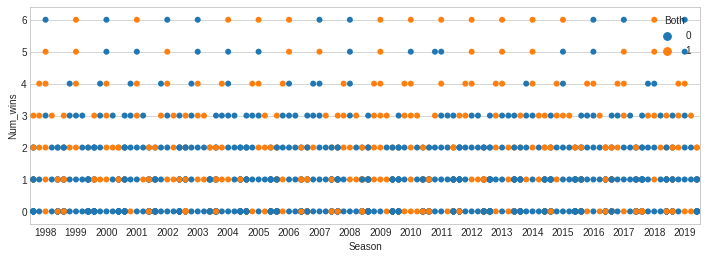

In [81]:
# Scatter plot
fig, ax = plt.subplots(figsize=(12,4))
sns.swarmplot(ax=ax, x= Men_w_Wom['Season'],
             y = Men_w_Wom['Num_wins'], hue = Men_w_Wom['Both'], size=6)

### Now We make the dataset used for the first round games

# First Round of Tournament

## Add Columns

We are going to add columns for whether this is a Men's or Women's team and whether the team Won or Lost in each round


In [82]:
#Women Teams
Wom_w_Men['Gender'] = 'W'
Wom_w_Men['First_Round'] = Wom_w_Men['Num_wins'].map({0: 'Lost',
                                                      1: 'Won',
                                                      2: 'Won',
                                                      3: 'Won', 
                                                      4: 'Won',
                                                      5: 'Won',
                                                      6: 'Won'
                                                     })

# Round of Thirty Two
Wom_w_Men['Thirty_Two'] = Wom_w_Men['Num_wins'].map({1: 'Lost',
                                            2: 'Won',
                                            3: 'Won', 
                                            4: 'Won',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Sweet Sixteen
Wom_w_Men['Sweet_Sixteen'] = Wom_w_Men['Num_wins'].map({
                                            2: 'Lost',
                                            3: 'Won', 
                                            4: 'Won',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Elite Eight
Wom_w_Men['Elite_Eight'] = Wom_w_Men['Num_wins'].map({
                                            3: 'Lost', 
                                            4: 'Won',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Final Fourt
Wom_w_Men['Final_Four'] = Wom_w_Men['Num_wins'].map({ 
                                            4: 'Lost',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Championship
Wom_w_Men['Championship'] = Wom_w_Men['Num_wins'].map({
                                            5: 'Lost',
                                            6: 'Won'
                                           })



###-------------------------------------------------------------------------------------###
#Men Teams
Men_w_Wom['Gender'] = 'M'
Men_w_Wom['First_Round'] = Men_w_Wom['Num_wins'].map({0: 'Lost',
                                                      1: 'Won',
                                                      2: 'Won',
                                                      3: 'Won', 
                                                      4: 'Won',
                                                      5: 'Won',
                                                      6: 'Won'
                                                     })

# Round of Thirty Two
Men_w_Wom['Thirty_Two'] = Men_w_Wom['Num_wins'].map({1: 'Lost',
                                            2: 'Won',
                                            3: 'Won', 
                                            4: 'Won',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Sweet Sixteen
Men_w_Wom['Sweet_Sixteen'] = Men_w_Wom['Num_wins'].map({
                                            2: 'Lost',
                                            3: 'Won', 
                                            4: 'Won',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Elite Eight
Men_w_Wom['Elite_Eight'] = Men_w_Wom['Num_wins'].map({
                                            3: 'Lost', 
                                            4: 'Won',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Final Fourt
Men_w_Wom['Final_Four'] = Men_w_Wom['Num_wins'].map({ 
                                            4: 'Lost',
                                            5: 'Won',
                                            6: 'Won'
                                           })

# Championship
Men_w_Wom['Championship'] = Men_w_Wom['Num_wins'].map({
                                            5: 'Lost',
                                            6: 'Won'
                                           })


In [83]:
Men_w_Wom.head(30)

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier,Both,Gender,First_Round,Thirty_Two,Sweet_Sixteen,Elite_Eight,Final_Four,Championship
0,1998,Arizona,3.0,89.4490,1,X,Top,1,M,Won,Won,Won,Lost,NaN,NaN
1,1998,Arkansas,1.0,79.6460,6,X,Second,1,M,Won,Lost,NaN,NaN,NaN,NaN
2,1998,Butler,0.0,64.5945,13,Z,Bottom,0,M,Lost,NaN,NaN,NaN,NaN,NaN
3,1998,Charlotte,1.0,72.1395,8,W,Second,0,M,Won,Lost,NaN,NaN,NaN,NaN
4,1998,Cincinnati,1.0,72.8155,2,X,Top,0,M,Won,Lost,NaN,NaN,NaN,NaN
5,1998,Clemson,0.0,71.6795,6,Y,Second,1,M,Lost,NaN,NaN,NaN,NaN,NaN
6,1998,Col Charleston,0.0,65.8500,14,Y,Bottom,0,M,Lost,NaN,NaN,NaN,NaN,NaN
7,1998,Connecticut,3.0,70.5990,2,W,Top,1,M,Won,Won,Won,Lost,NaN,NaN
8,1998,Davidson,0.0,68.5275,14,Z,Bottom,0,M,Lost,NaN,NaN,NaN,NaN,NaN
9,1998,Delaware,0.0,71.3335,15,Y,Bottom,0,M,Lost,NaN,NaN,NaN,NaN,NaN


In [84]:
Men_w_Wom.shape

(1454, 15)

In [85]:
Wom_w_Men.shape

(1408, 15)

## First Chart: First Round

The first chart will look at the first round of play and determine whether it is more likely a team will win or lose in the first round based on their counterpart being in the tournament

Make a FacetGrid bar chart
1. Two main columns for the charts: Teams in both tournaments, and teams not in both
2. Two rows for columns: Mens and Womens

1. Two bars in charts (x-axis): Win and loss
2. Y-axis: number of teams that won and lost


  So for the women's dataset we should take the WTeamNames and their season and make a new list with only the unique() WTeamNames (so that everyteam name is only shown once in a season). This should result in 32 names in a season (WE CAN PROBABLY JUST DROP THE NUMBER OF WINS FROM THE Wom_w_Men DATASET)

Then we can take the losing teams for each season (should be 32 per season) and put them in a column called LTeamNames in the dataset. 

Then for each of those we will have a column saying if the team is in men's and women's Tournaments.

So layout is:
Columns:  Season, WTeamNames, Wboth, LTeamNames, Lboth

Make new dataframe for graph:
Columns:  Season, TeamName, Women/Men, Win/loss, Both

In [86]:
# concatinate(join) datasets
All_Teams = pd.concat([Wom_w_Men, Men_w_Wom], axis=0)

In [87]:
All_Teams.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier,Both,Gender,First_Round,Thirty_Two,Sweet_Sixteen,Elite_Eight,Final_Four,Championship
0,1998,Alabama,2.0,75.0080,2,X,Top,0,W,Won,Won,Lost,NaN,NaN,NaN
1,1998,Arizona,2.0,74.6665,3,W,Top,1,W,Won,Won,Lost,NaN,NaN,NaN
2,1998,Arkansas,4.0,72.5350,9,Z,Intermediate,1,W,Won,Won,Won,Won,Lost,NaN
3,1998,Clemson,1.0,67.0795,6,X,Second,1,W,Won,Lost,NaN,NaN,NaN,NaN
4,1998,Colorado St,1.0,76.3620,12,X,Intermediate,0,W,Won,Lost,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



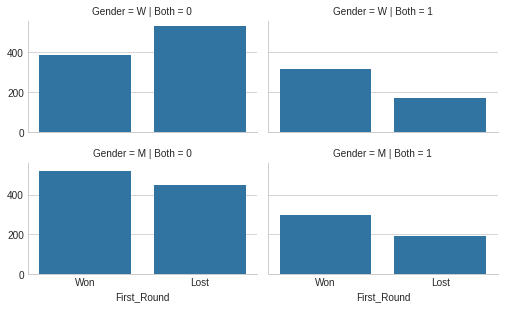

In [88]:
# Code for grid of barcharts
grid=sns.FacetGrid(All_Teams, row='Gender', col='Both', size=2.2, aspect=1.6)
grid.map(sns.countplot, 'First_Round')
grid.add_legend()

So it looks like having a counterpart in the tournament means you have a higher chance of winning for both men and women. And not having a counterpart means you are more likely to lose

But there was a higher number of non-counterpart having teams in the tournament. 

We are going to explore this further such as how does it affect the teams in the sweet 16, elite 8, final 4, and championship.

# Tournament

Make chart that has a new column. The column is which round they made it to (or lost in). Options are Round of 32, Sweet 16, Elite 8, Final Four, Championship. Measured by the number of wins the team has. 

In [89]:
# add new column
# datasets: MenWT and Wom_w_Men

# map the new column
#Men
Men_w_Wom['Round_Out'] = Men_w_Wom['Num_wins'].map({0: 'First Round',
                                            1: 'Round of 32',
                                            2: 'Sweet Sixteen',
                                            3: 'Elite Eight', 
                                            4: 'Final Four',
                                            5: 'Championship',
                                            6: 'Winner'
                                           })

# Women
Wom_w_Men['Round_Out'] = Wom_w_Men['Num_wins'].map({0: 'First Round',
                                        1: 'Round of 32',
                                        2: 'Sweet Sixteen',
                                        3: 'Elite Eight', 
                                        4: 'Final Four',
                                        5: 'Championship',
                                        6: 'Winner'
                                       })


In [90]:
Men_w_Wom.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier,Both,Gender,First_Round,Thirty_Two,Sweet_Sixteen,Elite_Eight,Final_Four,Championship,Round_Out
0,1998,Arizona,3.0,89.4490,1,X,Top,1,M,Won,Won,Won,Lost,NaN,NaN,Elite Eight
1,1998,Arkansas,1.0,79.6460,6,X,Second,1,M,Won,Lost,NaN,NaN,NaN,NaN,Round of 32
2,1998,Butler,0.0,64.5945,13,Z,Bottom,0,M,Lost,NaN,NaN,NaN,NaN,NaN,First Round
3,1998,Charlotte,1.0,72.1395,8,W,Second,0,M,Won,Lost,NaN,NaN,NaN,NaN,Round of 32
4,1998,Cincinnati,1.0,72.8155,2,X,Top,0,M,Won,Lost,NaN,NaN,NaN,NaN,Round of 32


## Men and Women's Team in Each Round of Tournament

## First Round

Try new code

In [91]:
# Men's First Round of Tournament

def FR_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'First Round'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

FRM = FR_Men(Men_w_Wom)
FRM.head()

,index,Coed Team in Round,Round
1,1,0.33,First Round


In [92]:
# Women's First Round of Tournament

def FR_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'First Round'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

FRW = FR_Wom(Wom_w_Men)
FRW.head()

,index,Coed Team in Round,Round
1,1,0.35,First Round


## Round of Thirty-Two

In [93]:
# Men's Round of 32
RThirty_Two = Men_w_Wom.loc[Men_w_Wom['Num_wins'] >=1]

def ThTwo_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Round of 32'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

In [94]:
RTTM = ThTwo_Men(RThirty_Two)
RTTM.head()

,index,Coed Team in Round,Round
1,1,0.4,Round of 32


Only 40% of the teams in the Round of 32 have a counterpart in the tournament. But we know that a majority of those teams win their game (5-%). And we know that in the rounds after this (Sweet Sixteen, Elite Eight, etc.) the percentage of teams that have a counterpart is higher.

In [95]:
# Women's Round of 32
RThirty_Two_W = Wom_w_Men.loc[Wom_w_Men['Num_wins'] >=1]

def ThTwo_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Round of 32'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

In [96]:
RTTW = ThTwo_Wom(RThirty_Two_W)
RTTW.head()

,index,Coed Team in Round,Round
1,1,0.45,Round of 32


## Sweet Sixteen

We are going to look at what effect having a counterpart has on making it to the sweet sixteen. So for each year we look at the 8 teams that have 2 wins (the losers) and the 8 teams that have more than two wins, and determine which ones have counterparts. So we look at all 16 teams in the sweet sixteen for all 22 seasons.

In [97]:
#Mens Sweet Sixteen
Sweet_Sixteen = Men_w_Wom.loc[Men_w_Wom['Num_wins'] >=2]

def SwSix_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Sweet Sixteen'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

SSM = SwSix_Men(Sweet_Sixteen)
SSM.head()

,index,Coed Team in Round,Round
1,1,0.47,Sweet Sixteen


Only 46% of teams in the Sweet Sixteen have a counterpart

Make a graph showing percentage of teams that make it to sweet sixteen who have a counterpart

In [98]:
# Women's Sweet Sixteen
Sweet_Sixteen_W = Wom_w_Men.loc[Wom_w_Men['Num_wins'] >=2]

def SwSix_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Sweet Sixteen'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

SSW = SwSix_Wom(Sweet_Sixteen_W)
SSW.head()

,index,Coed Team in Round,Round
1,1,0.48,Sweet Sixteen


## Elite Eight

Take rows where the number of wins are 3 or greater

In [99]:
# Mens Elite Eight
Elite_eight = Men_w_Wom.loc[Men_w_Wom['Num_wins'] >=3]

def E8_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Elite Eight'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

EEM = E8_Men(Elite_eight)
EEM.head()

,index,Coed Team in Round,Round
0,1,0.53,Elite Eight


In [100]:
# Womens Elite Eight
Elite_eight_W = Wom_w_Men.loc[Wom_w_Men['Num_wins'] >=3]

def E8_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Elite Eight'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

EEW = E8_Wom(Elite_eight_W)
EEW.head()

,index,Coed Team in Round,Round
0,1,0.54,Elite Eight


## Final Four

In [101]:
#Mens Final Four
Final_Four = Men_w_Wom.loc[Men_w_Wom['Num_wins'] >=4]

def F4_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Final Four'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

FFM = F4_Men(Final_Four)
FFM.head()

,index,Coed Team in Round,Round
0,1,0.6,Final Four


In [102]:
# Womens Final Four
Final_Four_W = Wom_w_Men.loc[Wom_w_Men['Num_wins'] >=4]

def F4_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Final Four'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

FFW = F4_Wom(Final_Four_W)
FFW.head()

,index,Coed Team in Round,Round
0,1,0.53,Final Four


## Championship

In [103]:
# Men's Championship
Championship = Men_w_Wom.loc[Men_w_Wom['Num_wins'] >=5]

def Ship_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Championship'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

CSM = Ship_Men(Championship)
CSM.head()

,index,Coed Team in Round,Round
0,1,0.53,Championship


In [104]:
# Women's Championship
Championship_W = Wom_w_Men.loc[Wom_w_Men['Num_wins'] >=5]

def Ship_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Championship'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

CSW = Ship_Wom(Championship_W)
CSW.head()

,index,Coed Team in Round,Round
0,1,0.64,Championship


## Tournament Winner

In [105]:
# Men's Tournament Winner
Tourn_Winner = Men_w_Wom.loc[Men_w_Wom['Num_wins'] == 6]

def TC_Men(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Tournament Champion'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

TCM = TC_Men(Tourn_Winner)
TCM.head()

,index,Coed Team in Round,Round
0,1,0.59,Tournament Champion


In [106]:
# Women's Tournament Winner
Tourn_Winner_W = Wom_w_Men.loc[Wom_w_Men['Num_wins'] == 6]

def TC_Wom(dataset):
    RTT = dataset.Both.value_counts(normalize=True).round(2)
    RTR = pd.DataFrame({'Coed Team in Round': RTT})
    RTR = RTR.reset_index()
    RTR['Round'] = 'Tournament Champion'
    RTR = RTR.loc[RTR['index']==1]
    return RTR

TCW = TC_Wom(Tourn_Winner_W)
TCW.head()

,index,Coed Team in Round,Round
0,1,0.73,Tournament Champion


### Graph of Teams in Each Round

In [107]:
# Make new dataset from percentages above
#Mens Teams in Each Round
pdm_list = [FRM, RTTM, SSM, EEM, FFM, CSM, TCM]
Perc_MTeams_in_Round = pd.concat(pdm_list)

# Womens Teams in Each Round
pdw_list = [FRW, RTTW, SSW, EEW, FFW, CSW, TCW]
Perc_WTeams_in_Round = pd.concat(pdw_list)

In [108]:
Perc_MTeams_in_Round.head()

,index,Coed Team in Round,Round
1,1,0.33,First Round
1,1,0.40,Round of 32
1,1,0.47,Sweet Sixteen
0,1,0.53,Elite Eight
0,1,0.60,Final Four


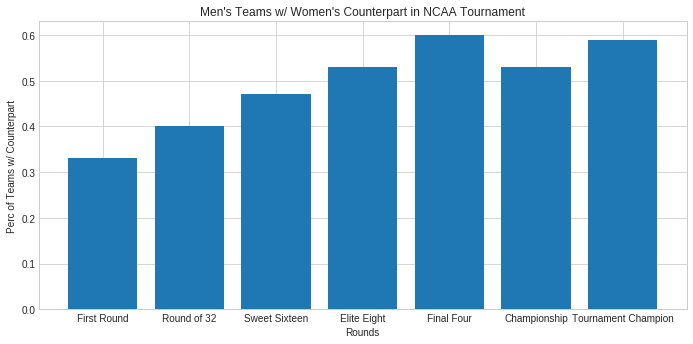

In [109]:
# Mens bar chart
#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=[9,4])
ax = fig.add_axes([0,0,1,1])
rounds = Perc_MTeams_in_Round.Round
teams = Perc_MTeams_in_Round['Coed Team in Round']
ax.bar(rounds,teams)
plt.xlabel('Rounds')
plt.ylabel('Perc of Teams w/ Counterpart')
plt.title("Men's Teams w/ Women's Counterpart in NCAA Tournament")
plt.show()

In [110]:
Perc_WTeams_in_Round.head()

,index,Coed Team in Round,Round
1,1,0.35,First Round
1,1,0.45,Round of 32
1,1,0.48,Sweet Sixteen
0,1,0.54,Elite Eight
0,1,0.53,Final Four


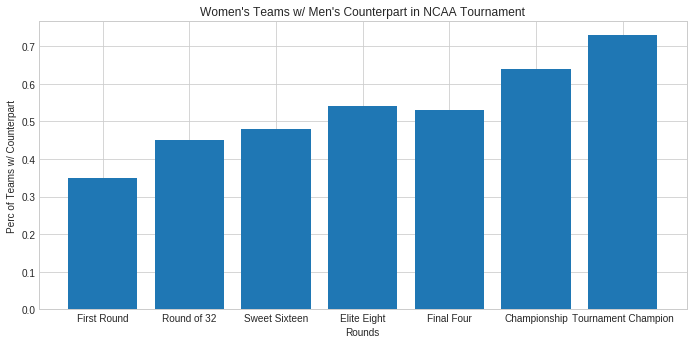

In [111]:
# Womens bar chart
fig = plt.figure(figsize=[9, 4])
ax = fig.add_axes([0,0,1,1])
rounds = Perc_WTeams_in_Round.Round
teams = Perc_WTeams_in_Round['Coed Team in Round']
ax.bar(rounds,teams)
plt.xlabel('Rounds')
plt.ylabel('Perc of Teams w/ Counterpart')
plt.title("Women's Teams w/ Men's Counterpart in NCAA Tournament")
plt.show()

For both, and more so for the women, the number of programs that have a team in both men and women's tournament rises as you go further into the tournament. Based on this graph we should also see that the probability of a program with two teams winning is greater than 50% for most of these rounds.

This is because to have a growing number of these programs as the tournament progresses, these teams must be winning more games than programs without each round (and therefore more likely to win games in the tournament). 

Make one big line chart showing Men and Women teams with and without counterpart per round. This will be a line chart showing how one rises and the other falls over the course of the rounds. 

In [112]:
# Line chart
# Need to make dataset w/ perc of teams without counterpart


# Winning Percentage

In the above section we showed that in each round of the tournament the percentage of programs that had both a men and women's team in the tournament rose from the previous round. 

Since the number of programs in the tournament each season with only one team participating is higher than the number of programs with two, the programs with a men and women's team in the tournament must be winning at a higher percentage than a program without both teams in most rounds. 

### Datasets

Now we need to make two datasets for the women and two for the men

The two will be one where the team has a counterpart (Both=1) and the other is where the team has no counterpart (Both=0)


In [113]:
# MEN TEAMS
# Teams with counterpart
men_winperc_both = Men_w_Wom.loc[Men_w_Wom['Both']==1]

# Teams without counterpart
men_winperc_single = Men_w_Wom.loc[Men_w_Wom['Both']==0]

###-------------------------------------------------------###

# WOMEN TEAMS
# Teams with counterpart
wom_winperc_both = Wom_w_Men.loc[Men_w_Wom['Both']==1]

# Teams without counterpart
wom_winperc_single = Wom_w_Men.loc[Wom_w_Men['Both']==0]

In [114]:
# Get the percentage of teams that won that round of the tournament for both = 1 & 0

# First Round
def get_perc_FR(dataset):
    c = dataset.First_Round
    percent = c.value_counts(normalize=True).round(2)
    ab = pd.DataFrame({'Prob_win': percent})
    ab = ab.reset_index()
    ab['Round'] = 'First_Round'
    ba = ab.loc[ab['index']=='Won']
    return ba

# Round of 32
def get_perc_TT(dataset):
    c = dataset.Thirty_Two
    #percent = c.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    percent = c.value_counts(normalize=True).round(2)
    ab = pd.DataFrame({'Prob_win': percent})
    ab = ab.reset_index()
    ab['Round'] = 'Round of Thirty-Two'
    ba = ab.loc[ab['index']=='Won']
    return ba


# Sweet Sixteen
def get_perc_SS(dataset):
    c = dataset.Sweet_Sixteen
    percent = c.value_counts(normalize=True).round(2)
    ab = pd.DataFrame({'Prob_win': percent})
    ab = ab.reset_index()
    ab['Round'] = 'Sweet Sixteen'
    ba = ab.loc[ab['index']=='Won']
    return ba

# Elite eight
def get_perc_EE(dataset):
    c = dataset.Elite_Eight
    percent = c.value_counts(normalize=True).round(2)
    ab = pd.DataFrame({'Prob_win': percent})
    ab = ab.reset_index()
    ab['Round'] = 'Elite Eight'
    ba = ab.loc[ab['index']=='Won']
    return ba

# Final Four
def get_perc_FF(dataset):
    c = dataset.Final_Four
    percent = c.value_counts(normalize=True).round(2)
    ab = pd.DataFrame({'Prob_win': percent})
    ab = ab.reset_index()
    ab['Round'] = 'Final Four'
    ba = ab.loc[ab['index']=='Won']
    return ba

# Championship
def get_perc_CC(dataset):
    c = dataset.Championship
    percent = c.value_counts(normalize=True).round(2)
    ab = pd.DataFrame({'Prob_win': percent})
    ab = ab.reset_index()
    ab['Round'] = 'Championship'
    ba = ab.loc[ab['index']=='Won']
    return ba

#### Programs with Counterpart

In [115]:
# Men's programs with women's team in tournament; Both=1
M_FR = get_perc_FR(men_winperc_both)
M_TT = get_perc_TT(men_winperc_both)
M_SS = get_perc_SS(men_winperc_both)
M_EE = get_perc_EE(men_winperc_both)
M_FF = get_perc_FF(men_winperc_both)
M_CC = get_perc_CC(men_winperc_both)

# Concatinate into one dataset
mba_list = [M_FR,M_TT, M_SS, M_EE, M_FF, M_CC]
men_win_perc = pd.concat(mba_list)

# Women's programs with men's team in tournament; Both=1
W_FR = get_perc_FR(wom_winperc_both)
W_TT = get_perc_TT(wom_winperc_both)
W_SS = get_perc_SS(wom_winperc_both)
W_EE = get_perc_EE(wom_winperc_both)
W_FF = get_perc_FF(wom_winperc_both)
W_CC = get_perc_CC(wom_winperc_both)

# Concatinate into one dataset
wba_list = [W_FR,W_TT, W_SS, W_EE, W_FF, W_CC]
wom_win_perc = pd.concat(wba_list)

In [116]:
# Men Teams winning percentage; Both=1
men_win_perc = men_win_perc.drop('index', axis=1)
men_win_perc.head()

,Prob_win,Round
0,0.61,First_Round
0,0.56,Round of Thirty-Two
0,0.57,Sweet Sixteen
0,0.56,Elite Eight
1,0.45,Final Four


In [117]:
# Women Teams winning percentage; Both=1
wom_win_perc = wom_win_perc.drop('index', axis=1)
wom_win_perc.head()

,Prob_win,Round
1,0.50,First_Round
0,0.52,Round of Thirty-Two
1,0.44,Sweet Sixteen
1,0.48,Elite Eight
0,0.62,Final Four


#### Programs Without Counterpart

In [118]:
# Men's programs without women's team in tournament; Both=0
M_FR_wo = get_perc_FR(men_winperc_single)
M_TT_wo = get_perc_TT(men_winperc_single)
M_SS_wo = get_perc_SS(men_winperc_single)
M_EE_wo = get_perc_EE(men_winperc_single)
M_FF_wo = get_perc_FF(men_winperc_single)
M_CC_wo = get_perc_CC(men_winperc_single)

# Concatinate into one dataset
mab_list = [M_FR_wo, M_TT_wo, M_SS_wo, M_EE_wo, M_FF_wo, M_CC_wo]
men_win_perc_wo = pd.concat(mab_list)

# Women's programs without men's team in tournament; Both=0
W_FR_wo = get_perc_FR(wom_winperc_single)
W_TT_wo = get_perc_TT(wom_winperc_single)
W_SS_wo = get_perc_SS(wom_winperc_single)
W_EE_wo = get_perc_EE(wom_winperc_single)
W_FF_wo = get_perc_FF(wom_winperc_single)
W_CC_wo = get_perc_CC(wom_winperc_single)

# Concatinate into one dataset
wab_list = [W_FR_wo, W_TT_wo, W_SS_wo, W_EE_wo, W_FF_wo, W_CC_wo]
wom_win_perc_wo = pd.concat(wab_list)

In [119]:
# Men Teams; Both=0
men_win_perc_wo = men_win_perc_wo.drop('index', axis=1)
men_win_perc_wo.head()

,Prob_win,Round
1,0.46,First_Round
1,0.43,Round of Thirty-Two
1,0.45,Sweet Sixteen
1,0.41,Elite Eight
0,0.60,Final Four


In [120]:
# Women Teams; Both=0
wom_win_perc_wo = wom_win_perc_wo.drop('index', axis=1)
wom_win_perc_wo.head()

,Prob_win,Round
1,0.42,First_Round
1,0.47,Round of Thirty-Two
1,0.45,Sweet Sixteen
0,0.51,Elite Eight
1,0.39,Final Four


### Line Chart
Percentage Chance of Winning
* x-axis: will be number of games won, but measured as first round, second round, sweet sixteen, elite eight, final four, and championship
* y-axis: Measures the actual percentage changes. The percentage will be the probability of your team winning, and one line will be if counterpart in torunament, the other is if no counterpart.

The graph will show the rate at which each type of program wins per round throughout all 22 years of the tournament. The types of programs are: (1) programs with both a women's and a men's team in the tournament in the same year, (2) programs with only one team in the tournament

<function matplotlib.pyplot.show(*args, **kw)>

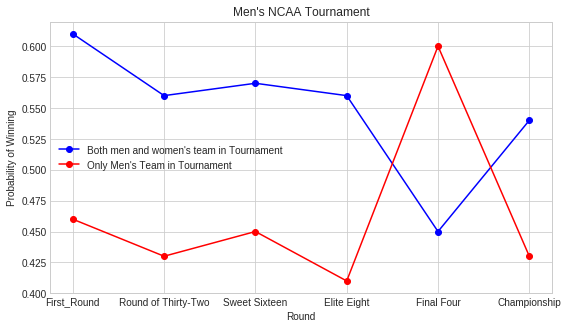

In [121]:
# Men Teams winning percentage plot
plt.subplots(figsize=(9,5))
plt.plot('Round', 'Prob_win', '-ok', data = men_win_perc, 
         label="Both men and women's team in Tournament",
         color = 'blue'
        )
plt.xlabel('Round')
plt.plot('Round', 'Prob_win', '-ok', data = men_win_perc_wo,
         label="Only Men's Team in Tournament",
         color = 'red'
        )
plt.ylabel('Probability of Winning')
plt.title("Men's NCAA Tournament")
plt.legend()
plt.show

#### Women's Programs Chart

<function matplotlib.pyplot.show(*args, **kw)>

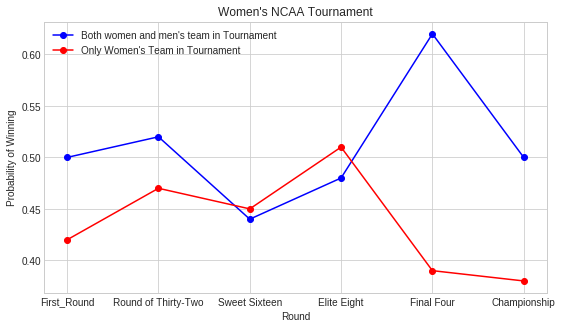

In [122]:
# Women Teams winning percentage plot
plt.subplots(figsize=(9,5))
plt.plot('Round', 'Prob_win', '-ok', data = wom_win_perc, 
         label="Both women and men's team in Tournament",
         color = 'blue'
        )
plt.xlabel('Round')
plt.plot('Round', 'Prob_win', '-ok', data = wom_win_perc_wo,
         label="Only Women's Team in Tournament",
         color = 'red'
        )
plt.ylabel('Probability of Winning')
plt.title("Women's NCAA Tournament")
plt.legend()
plt.show

The graphs show us that in the Men's NCAA Tournament, the programs that also have a women's team in the Women's NCAA Tournament in the same year win at a higher rate than those without in all rounds except the Final Four.
In the Women's NCAA Tournament, the programs that have a men's team participating in the Men's NCAA Tournament in the same year win at a higher rate than those without in all rounds except Sweet Sixteen and Elite Eight, but they vastly outperform in the final four and championship games

Overall in the Men's and Women's NCAA Basketball Tournaments the programs that have both a men and women's team in the tournament in the same year have an overall higher win percentage than those teams without. 

[Find overall win percentage]

### Win Rate per Round by Season

We're going to need to make some kind of plot like a joyplot, that has the y-axis=Season, x-axis=Round, and a column for Both=1 and Both=0 showing the win percentage in each round. 

Look at bottom of notebook under Seeds category for joyplot of wins per season.

## Wins by Counterpart Teams by Season

We make a line graph with the season (1998-2019) on the x-axis and number of wins on the y-axis. To get number of wins we take the sum of the Num_wins column. 

One line will be for teams that have both men and women's team in tournament (Both=1). The other line is for teams that have only one women's or men's team in tournament.

Do one graph for the men and one for the women. 

### Women Teams

In [123]:
Womens_Wins = Wom_w_Men.groupby(['Season', 'Both'])
Womens_Wins = Womens_Wins.agg({'Num_wins':['sum']})
#Womens_Wins.columns = ['Season', 'Both', 'Num_wins']
Womens_Wins = Womens_Wins.reset_index()
Womens_Wins.columns = ['Season', 'Both', 'Num_wins']
Womens_Wins.head()

,Season,Both,Num_wins
0,1998,0,31.0
1,1998,1,32.0
2,1999,0,37.0
3,1999,1,26.0
4,2000,0,36.0


In [124]:
# Separate into dataframe with counterpart and w/o
women_wins_both = Womens_Wins.loc[Womens_Wins['Both']==1]
women_wins_one = Womens_Wins.loc[Womens_Wins['Both']==0]

In [125]:
women_wins_one.head()

,Season,Both,Num_wins
0,1998,0,31.0
2,1999,0,37.0
4,2000,0,36.0
6,2001,0,39.0
8,2002,0,38.0


Make a line chart with dots for each point

<function matplotlib.pyplot.show(*args, **kw)>

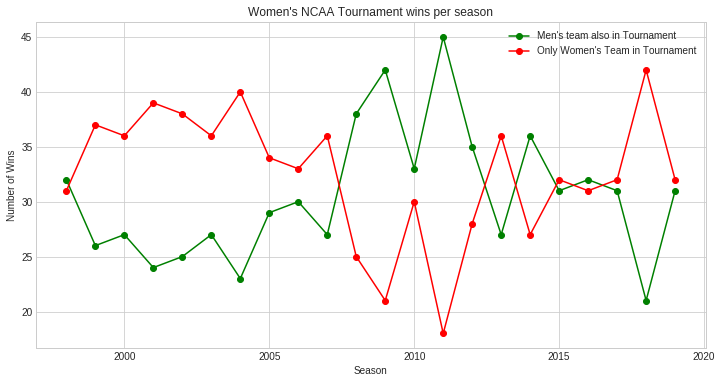

In [126]:
plt.subplots(figsize=(12,6))
plt.plot('Season', 'Num_wins', '-ok', data = women_wins_both, 
         label="Men's team also in Tournament",
         color = 'green'
        )
plt.xlabel('Season')
plt.plot('Season', 'Num_wins', '-ok', data = women_wins_one,
         label="Only Women's Team in Tournament",
         color = 'red'
        )
plt.ylabel('Number of Wins')
plt.title("Women's NCAA Tournament wins per season")
plt.legend()
plt.show

### Men Teams

In [127]:
Mens_Wins = Men_w_Wom.groupby(['Season', 'Both'])
Mens_Wins = Mens_Wins.agg({'Num_wins':['sum']})
Mens_Wins = Mens_Wins.reset_index()
Mens_Wins.columns = ['Season', 'Both', 'Num_wins']
Mens_Wins.head()

,Season,Both,Num_wins
0,1998,0,30.0
1,1998,1,33.0
2,1999,0,33.0
3,1999,1,30.0
4,2000,0,35.0


In [128]:
# Separate into two dataframes
men_wins_both = Mens_Wins.loc[Mens_Wins['Both']==1]
men_wins_one = Mens_Wins.loc[Mens_Wins['Both']==0]

Graph

I would like to shade the area under the lines for better visuals. FIGURE OUT HOW!

<function matplotlib.pyplot.show(*args, **kw)>

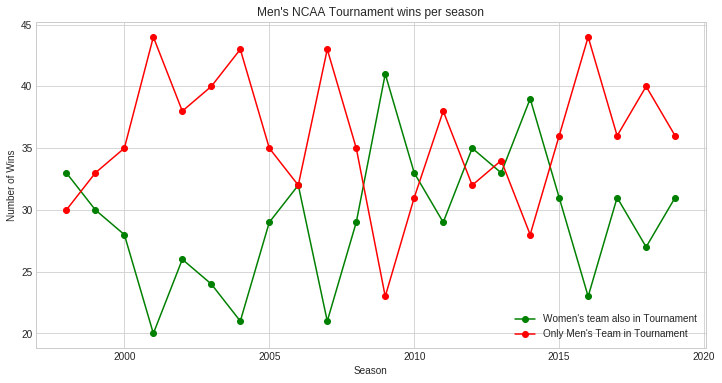

In [129]:
plt.subplots(figsize=(12,6))
plt.plot('Season', 'Num_wins', '-ok', data = men_wins_both, 
         label="Women's team also in Tournament",
         color = 'green'
        )
plt.xlabel('Season')
plt.plot('Season', 'Num_wins', '-ok', data = men_wins_one,
         label="Only Men's Team in Tournament",
         color = 'red'
        )
plt.ylabel('Number of Wins')
plt.title("Men's NCAA Tournament wins per season")
plt.legend()
plt.show

Not really showing a good distribution. We need a graph that shows for each year the number of winners for each round for teams with counterparts and teams without.

## Other Charts

#### Histogram for Multiple Variables

I want a chart that has:
* x-axis: Seasons
* y-axis: Number of teams that won in that round
Then I want each season to have a histogram with layers. Each lawyer represents a round of the tournament and the number of teams that won (bottom layer = R32, second layer=Sweet Sixteen, etc.)

#### Womens

We probably want the WMW dataset, and we want to use the Seasons, Num_wins, and Both columns

In [130]:
stack_bar = Wom_w_Men[['Season', 'Num_wins', 'Both']].groupby(['Season', 'Both'])
stack_bar = stack_bar.Num_wins.value_counts().rename(columns={'Num_wins': 'Total'})
stack_bar = pd.DataFrame(stack_bar)

In [131]:
stack_bar = stack_bar.reset_index()
stack_bar = stack_bar.rename(columns={0: 'Total'})
stack_bar.head()

,Season,Both,Num_wins,Total
0,1998,0,0.0,25
1,1998,0,1.0,12
2,1998,0,2.0,5
3,1998,0,4.0,1
4,1998,0,5.0,1


In [132]:
# Separate to counterpart and no counterpart
stack_bar_C = stack_bar.loc[stack_bar['Both']==1]

# no counterpart
stack_bar_nc = stack_bar.loc[stack_bar['Both']==0]

In [133]:
# make pivot table
# Women's teams with counterpart
sb_counter = stack_bar_C.pivot(index='Season', columns='Num_wins', values='Total')
sb_counter.fillna(0, inplace=True)

# Women's teams without counterpart
sb_nocount = stack_bar_nc.pivot(index='Season', columns='Num_wins', values='Total')
sb_nocount.fillna(0, inplace=True)


In [134]:
sb_counter.head()

Num_wins,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Season,,,,,,,
1998,7.0,4.0,3.0,4.0,1.0,0.0,1.0
1999,8.0,5.0,2.0,2.0,0.0,1.0,1.0
2000,6.0,5.0,4.0,1.0,0.0,1.0,1.0
2001,7.0,5.0,5.0,1.0,0.0,0.0,1.0
2002,8.0,4.0,3.0,0.0,1.0,1.0,1.0


In [135]:
sb_nocount.head()

Num_wins,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Season,,,,,,,
1998,25.0,12.0,5.0,0.0,1.0,1.0,0.0
1999,24.0,11.0,6.0,2.0,2.0,0.0,0.0
2000,26.0,11.0,4.0,3.0,2.0,0.0,0.0
2001,25.0,11.0,3.0,3.0,2.0,1.0,0.0
2002,24.0,12.0,5.0,4.0,1.0,0.0,0.0


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



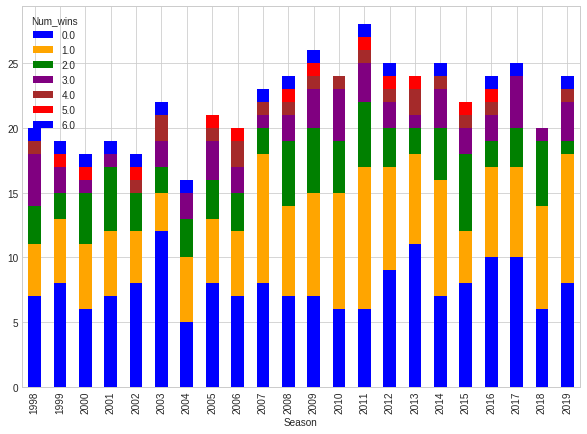

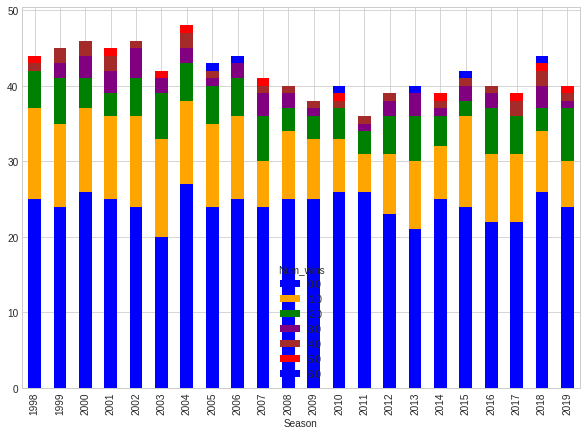

In [136]:
colors = ['blue', 'orange', 'green', 'purple', 'brown', 'red']
sb_counter.plot.bar(stacked=True, colors=colors, figsize=(10,7))
sb_nocount.plot.bar(stacked=True, colors=colors, figsize=(10,7))

Show the above chart and explain that the teams without a counterpart have a lot of first and second round wins because there are a lot of teams in the tournament without a counterpart.

Then show a graph with only teams that have won the sweet sixteen (at least three games), and the teams with counterparts should be higher everytime. 

### Men's

Make pivot tables

#### Joy Plot

First line women; Second line Men One distribution Both=1 (Orange) One distribution Both=0 (Blue)

# Other Factors Overlay

We overlay other factors on the teams to show that they do not substantially increase the win probability and that this is a valid factor. Overlay things like: last season tournament finish, how many times in tournament, seed in tournament, regular season play, points per game (ppg)

We need to control for other factors to show that the fact that both teams were in the tournament is the predictor of these wins. To do this we must control for factors like PPG, Seed of the team, the conference of the team. We want to do this so we can know these were not really the cause of the wins. We need to show that having a counterpart team in the other gender's tournament is an independent factor. 

# PPG of Schools with two teams and schools without

We must see whether other factors such as points per game or seeds correlate highly with this counterpart factor. If they do not correlate too highly then none of them explain this factor and it possibly stands on its own.

Make new column for men's and women's teams with average ppg in season and avg ppg in tournament.
Then we can make charts to see if points per game correlate with tournament wins and with whether counterpart in tournament (Both = 1)

In [137]:
# dataset with ppg
Wom_w_Men.head()

,Season,TeamName,Num_wins,PPG_seas,Seed,Region,Ranking_Tier,Both,Gender,First_Round,Thirty_Two,Sweet_Sixteen,Elite_Eight,Final_Four,Championship,Round_Out
0,1998,Alabama,2.0,75.0080,2,X,Top,0,W,Won,Won,Lost,NaN,NaN,NaN,Sweet Sixteen
1,1998,Arizona,2.0,74.6665,3,W,Top,1,W,Won,Won,Lost,NaN,NaN,NaN,Sweet Sixteen
2,1998,Arkansas,4.0,72.5350,9,Z,Intermediate,1,W,Won,Won,Won,Won,Lost,NaN,Final Four
3,1998,Clemson,1.0,67.0795,6,X,Second,1,W,Won,Lost,NaN,NaN,NaN,NaN,Round of 32
4,1998,Colorado St,1.0,76.3620,12,X,Intermediate,0,W,Won,Lost,NaN,NaN,NaN,NaN,Round of 32


Now we need to find the median ppg in each season. If a team is over that we put it in more likely(1) if under that we put it in less likely to win(0). Then we see if there is a significant correlation of likelihood to win if you have higher ppg. 

So we're going to need to add in another dataset with scores from the tournament games

### All Teams
Num_wins and PPG on x and y axis

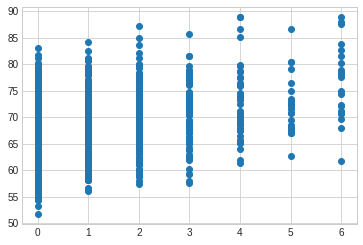

In [138]:
# Women Teams
#plt.style.use('default')
plt.scatter(Wom_w_Men['Num_wins'],Wom_w_Men['PPG_seas'])

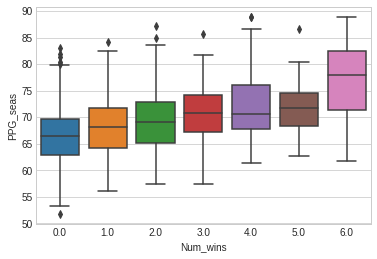

In [139]:
sns.boxplot(x=Wom_w_Men['Num_wins'], y=Wom_w_Men['PPG_seas'])

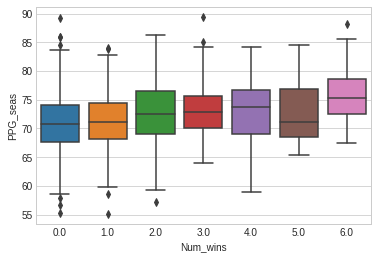

In [140]:
sns.boxplot(x=Men_w_Wom['Num_wins'], y=Men_w_Wom['PPG_seas'])

In [141]:
# Women
WPPG_Co = Wom_w_Men[['Round_Out', 'Num_wins', 'PPG_seas']].groupby(['Round_Out','Num_wins'])['PPG_seas'].mean()
wppg_coef = pd.DataFrame(WPPG_Co)
wppg_coef = wppg_coef.sort_values('Num_wins')
wppg_coef = wppg_coef.reset_index()


# Men
MPPG_Co = Men_w_Wom[['Round_Out', 'Num_wins', 'PPG_seas']].groupby(['Round_Out','Num_wins'])['PPG_seas'].mean()
mppg_coef = pd.DataFrame(MPPG_Co)
mppg_coef = mppg_coef.sort_values('Num_wins')
mppg_coef = mppg_coef.reset_index()

In [142]:
wppg_coef.head(10)

,Round_Out,Num_wins,PPG_seas
0,First Round,0.0,66.454781
1,Round of 32,1.0,68.121562
2,Sweet Sixteen,2.0,69.415125
3,Elite Eight,3.0,70.480562
4,Final Four,4.0,72.277114
5,Championship,5.0,72.423250
6,Winner,6.0,77.220682


In [143]:
mppg_coef.head(10)

,Round_Out,Num_wins,PPG_seas
0,First Round,0.0,70.880159
1,Round of 32,1.0,71.261677
2,Sweet Sixteen,2.0,72.474630
3,Elite Eight,3.0,73.180192
4,Final Four,4.0,72.976314
5,Championship,5.0,72.587043
6,Winner,6.0,75.843705


## Programs with Both Teams and Without

On average ppg is an indicator of a team making it further into the tournament. Let's see if that holds true for the teams with counterparts

#### Bar Chart
Average PPG for those teams where both = 1 and those teams both=0

In [144]:
# Women
wppg_1 = Wom_w_Men.loc[Wom_w_Men['Both'] == 1]
wppg_0 = Wom_w_Men.loc[Wom_w_Men['Both'] == 0]

# Men
mppg_1 = Men_w_Wom.loc[Men_w_Wom['Both'] ==1]
mppg_0 = Men_w_Wom.loc[Men_w_Wom['Both'] ==0]

In [145]:
# Men PPG
print(mppg_1['PPG_seas'].mean())
print(mppg_0['PPG_seas'].mean())

72.40690965092395
71.01858066184077


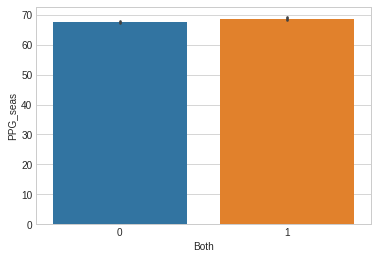

In [146]:
# Bar chart
# y = PPG(mean)
# x = both
sns.barplot(x=Wom_w_Men.Both, y=Wom_w_Men.PPG_seas)

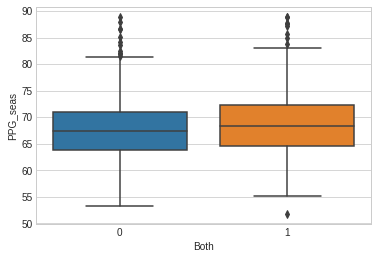

In [147]:
sns.boxplot(x=Wom_w_Men.Both, y=Wom_w_Men.PPG_seas)

In [148]:
mean_PPG1 = wppg_1['PPG_seas'].mean()
mean_PPG0 = wppg_0['PPG_seas'].mean()

In [149]:
# Women PPG
print('Avg. PPG w/Men: ', mean_PPG1)
print('Avg. PPG w/o Men: ', mean_PPG0)

Avg. PPG w/Men:  68.6827710472279
Avg. PPG w/o Men:  67.54197285559174


From the above graph we see that the average PPG for Women's teams with and without men in the tournament is essentially the same. The one with the counterpart is 1.1 points higher than without, but that is not a significant enough advantage to account for the significant outperformance by the programs with two teams in the tournament. 

### Women

In [150]:
#Women programs with Men also
ppg1 = wppg_1[['Num_wins', 'PPG_seas']].groupby('Num_wins')['PPG_seas'].mean()
ppg_1 = pd.DataFrame(ppg1,  columns=['PPG_seas'])
ppg_1 = ppg_1.reset_index()

#Women programs only
ppg2 = wppg_0[['Num_wins', 'PPG_seas']].groupby('Num_wins')['PPG_seas'].mean()
ppg_2 = pd.DataFrame(ppg2,  columns=['PPG_seas'])
ppg_2 = ppg_2.reset_index()

In [151]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Women&Men Teams', x = ppg_1['Num_wins'], y=ppg_1['PPG_seas']),
    go.Bar(name='Only Women Teams', x = ppg_2['Num_wins'], y=ppg_2['PPG_seas'])
])
fig.update_layout(barmode='group')
fig.show()

The PPG rises as the number of wins in the tournament the team has rises, but it is pretty even whether the team has a counterpart or no counterpart. In the later two rounds the ppg are even higher when the teams have no counterpart, which shows the teams with the lower ppg (with counterpart) are winning in these rounds.

In [152]:
#Men programs with Women also
ppg1_m = mppg_1[['Num_wins', 'PPG_seas']].groupby('Num_wins')['PPG_seas'].mean()
ppg_1_m = pd.DataFrame(ppg1_m,  columns=['PPG_seas'])
ppg_1_m = ppg_1_m.reset_index()

#Women programs only
ppg2_m = mppg_0[['Num_wins', 'PPG_seas']].groupby('Num_wins')['PPG_seas'].mean()
ppg_2_m = pd.DataFrame(ppg2_m,  columns=['PPG_seas'])
ppg_2_m = ppg_2_m.reset_index()

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Women&Men Teams', x = ppg_1_m['Num_wins'], y=ppg_1_m['PPG_seas']),
    go.Bar(name='Only Women Teams', x = ppg_2_m['Num_wins'], y=ppg_2_m['PPG_seas'])
])
fig.update_layout(barmode='group')
fig.show()

The PPG for the mens team are pretty even all the way through, with the programs with a counterpart having a slightly higher average ppg in most rounds. This could show that higher ppg explains their higher win percentage, but it doesn't explain all of it becasue this is such a slight difference. In the end it looks like the ppg does not explain the advantage programs with two teams in the tournament have. 

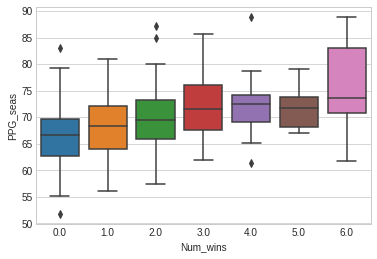

In [153]:
# Women with men
sns.boxplot(x=wppg_1['Num_wins'], y=wppg_1['PPG_seas'])

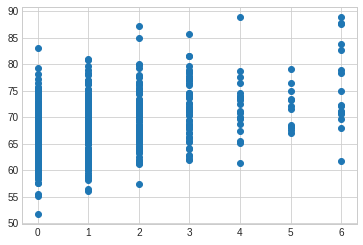

In [154]:
# Women where both=1
plt.scatter(wppg_1['Num_wins'],wppg_1['PPG_seas'])

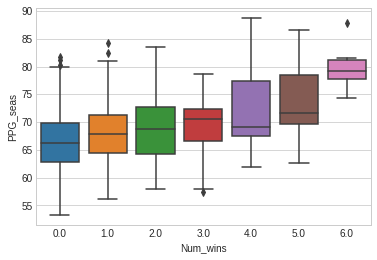

In [155]:
# Women without men
sns.boxplot(x=wppg_0['Num_wins'], y=wppg_0['PPG_seas'])

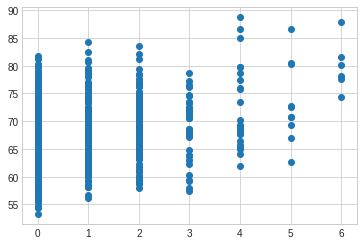

In [156]:
# Women where both=0
plt.scatter(wppg_0['Num_wins'], wppg_0['PPG_seas'])

For the women at first glance it doesn't look like there is a higher ppg for teams with mens

#### Mens

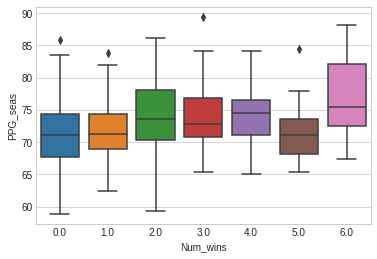

In [157]:
# Men with women
sns.boxplot(x=mppg_1['Num_wins'], y=mppg_1['PPG_seas'])

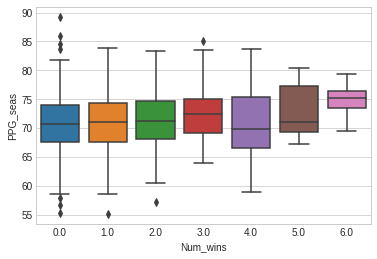

In [158]:
# Men without women
sns.boxplot(x=mppg_0['Num_wins'], y=mppg_0['PPG_seas'])

Seed

We know that on average the higher seeds will make further in the tournament. So there should be more low seeds in the early rounds, and majority high seeds in the later rounds. We need to see if the distribution of seeds is similar for teams with a counterpart and teams without. 

In [159]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=Wom_w_Men['Both'], y=Wom_w_Men['Seed'])])
fig.update_layout(barmode='stack')
fig.show()

In [160]:
#stacked bar
fig = px.bar(Wom_w_Men, x = 'Both', y = 'Seed', barmode='stack', color='Seed')
fig.show()

Next chart is a histogram showing the distribution of seeds in the tournament for both=1 and both=0.

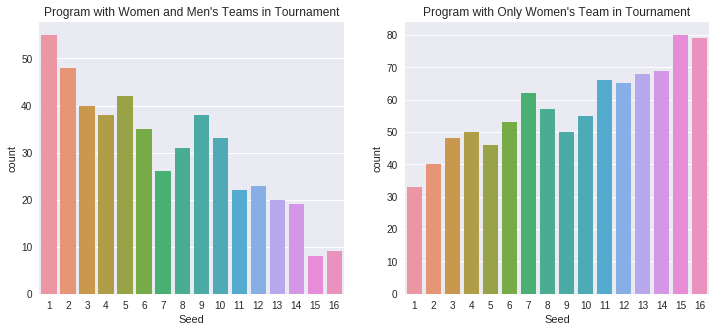

In [161]:
# Women
plt.style.use('seaborn')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Program with Women and Men's Teams in Tournament")
sns.countplot(data=wppg_1, x='Seed', ax=axs[0])
axs[1].set_title("Program with Only Women's Team in Tournament")
sns.countplot(data=wppg_0, x='Seed', ax=axs[1])

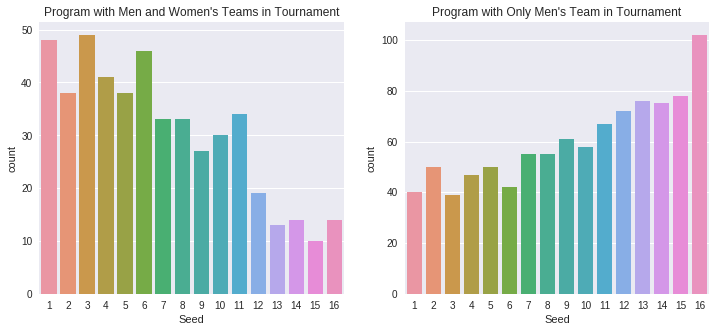

In [162]:
# Men
plt.style.use('seaborn')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Program with Men and Women's Teams in Tournament")
sns.countplot(data=mppg_1, x='Seed', ax=axs[0])
axs[1].set_title("Program with Only Men's Team in Tournament")
sns.countplot(data=mppg_0, x='Seed', ax=axs[1])

The teams with a counterpart in the tournament have mostly high seeds, and the teams in the tournament without a counterpart have almost as high a number of high seeds, but their distribution is more towards lower seeds. So most teams with lower seeds do not have a counterpart in the tournament. And the teams with high seeds are split about evenly. 

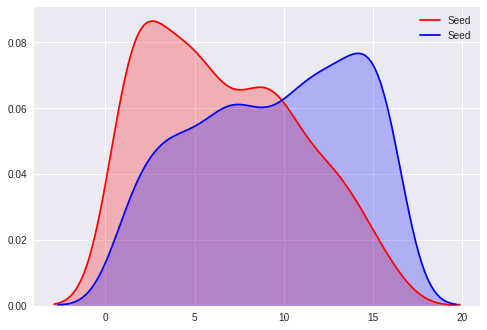

In [163]:
# Women
# density plot for multiple variables
# x-axis=Seed, y-axis=count of teams, variable is Both
p1=sns.kdeplot(wppg_1['Seed'], shade=True, color="r", legend='M&W Team in Tournament')
p1=sns.kdeplot(wppg_0['Seed'], shade=True, color="b", legend='Only W Team in Tournament')

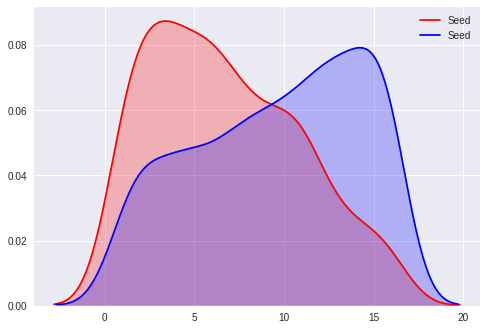

In [164]:
# Men
# Density Plot
p1=sns.kdeplot(mppg_1['Seed'], shade=True, color="r", legend='M&W Team in Tournament')
p1=sns.kdeplot(mppg_0['Seed'], shade=True, color="b", legend='Only W Team in Tournament')

The distribution shows that teams with a counterpart in tournaemnt have a higher seed, and teams without have a lower seed, on average. 

We can see above that teams with a counterpart in the tournament are more likely to be a higher seed, but are teams with a counterpart that are lower seeds, still more likely to win?

**Joyplot**
We are going to do a joyplot for the different tiers of seeds. This can show us whether Teams with counterparts are more likely to win no matter what their seed is.

In [165]:
W1_joy = wppg_1[['Season', 'TeamName', 'Num_wins', 'Seed', 'Ranking_Tier', 'Both', 'Gender']]
W0_joy = wppg_0[['Season', 'TeamName', 'Num_wins', 'Seed', 'Ranking_Tier', 'Both', 'Gender']]

In [166]:
W_joy = pd.concat([W1_joy, W0_joy])
W_joy['both_wins'] = W_joy['Num_wins'].loc[W_joy['Both']==1]

W_joy['nboth_wins'] = W_joy['Num_wins'].loc[W_joy['Both']==0]
W_joy.head()

,Season,TeamName,Num_wins,Seed,Ranking_Tier,Both,Gender,both_wins,nboth_wins
1,1998,Arizona,2.0,3,Top,1,W,2.0,NaN
2,1998,Arkansas,4.0,9,Intermediate,1,W,4.0,NaN
3,1998,Clemson,1.0,6,Second,1,W,1.0,NaN
5,1998,Connecticut,3.0,2,Top,1,W,3.0,NaN
7,1998,Duke,3.0,2,Top,1,W,3.0,NaN


<Figure size 1280x800 with 0 Axes>

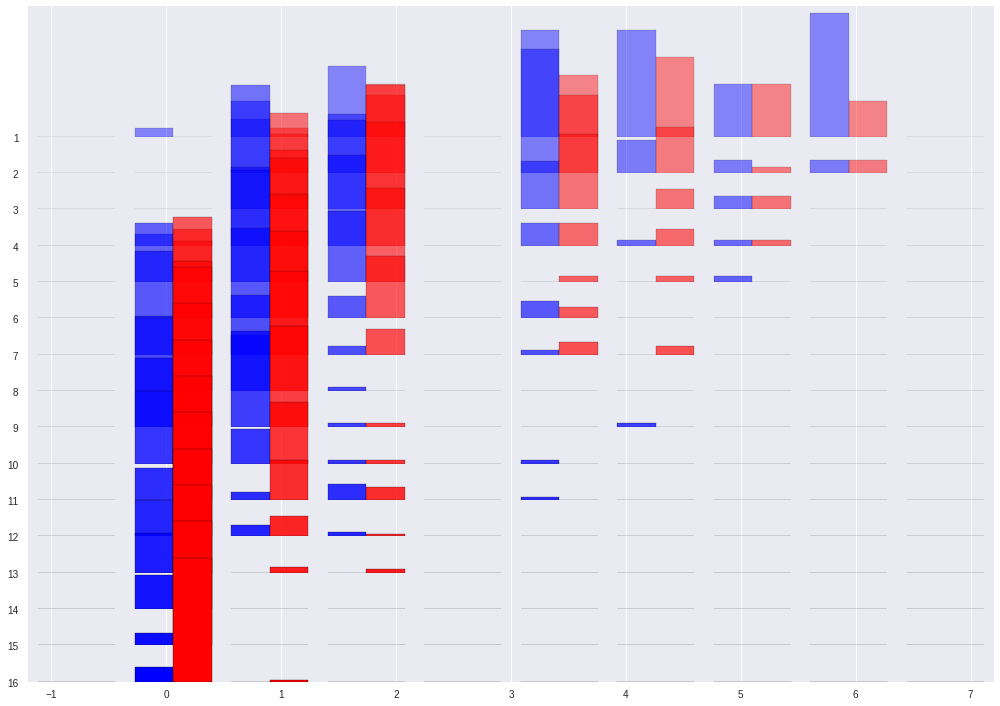

In [167]:
#Joyplot
# y-axis = I want each row to be one of the four tiers of seeds
# x-axis = This will be the number of wins the team has
# Each distribution (histogram without the bars) will show the number of teams with
#that amount of wins on the corresponding x-axis
# The distributions would be for Both=1 and Both=0

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(W_joy, column=['both_wins', 'nboth_wins'], by="Seed", ylim='own', color=['b', 'r'], 
                          hist=True, figsize=(14,10), grid=True, fade=True, overlap=2)


The blue is the team with counterpart and red is without. In the top ranked teams it looks like teams with a counterpart have a higher winning percentage. And even the second ranked teams distribution is higher in the sweet sixteen realm. But on the next few seeds the team without the counterpart seems to average more wins. 

Most of the seeds have similar distributions around the same number of wins, but the teams with a counterpart have longer and larger right tails (meaning more teams with high wins). 

(find technical (statistical measure) of these wins)

<Figure size 1280x800 with 0 Axes>

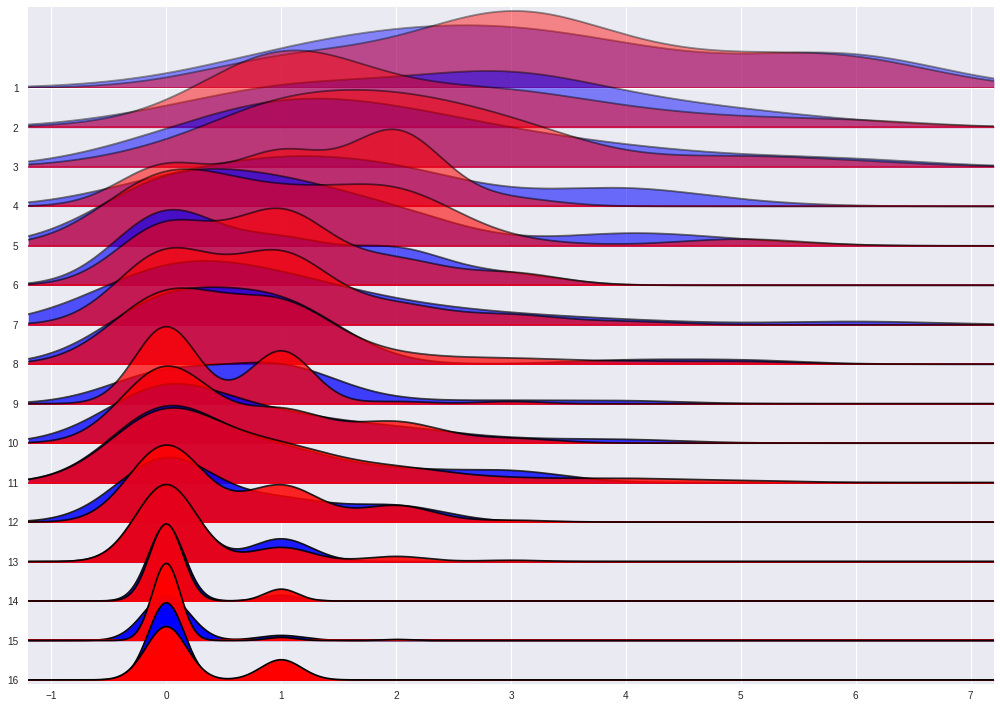

In [168]:
# Men
# Choose features
M1_joy = mppg_1[['Season', 'TeamName', 'Num_wins', 'Seed', 'Ranking_Tier', 'Both', 'Gender']]
M0_joy = mppg_0[['Season', 'TeamName', 'Num_wins', 'Seed', 'Ranking_Tier', 'Both', 'Gender']]

# Concatinate
M_joy = pd.concat([M1_joy, M0_joy])
M_joy['both_wins'] = M_joy['Num_wins'].loc[M_joy['Both']==1]
M_joy['nboth_wins'] = M_joy['Num_wins'].loc[M_joy['Both']==0]


#Joyplot
# y-axis = I want each row to be one of the four tiers of seeds
# x-axis = This will be the number of wins the team has
# Each distribution (histogram without the bars) will show the number of teams with
#that amount of wins on the corresponding x-axis
# The distributions would be for Both=1 and Both=0

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(M_joy, column=['both_wins', 'nboth_wins'], by="Seed", ylim='own', color=['b', 'r'], 
                          figsize=(14,10), grid=True, fade=True)


In [169]:
z = Wom_w_Men[['Num_wins', 'Seed', 'Both']].groupby('Num_wins')['Seed'].value_counts()

In [170]:
print(z)

Num_wins  Seed
0.0       14      88
          15      88
          16      87
          13      83
          12      71
                  ..
5.0       2        3
          4        2
          5        1
6.0       1       18
          2        4
Name: Seed, Length: 64, dtype: int64


In [171]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(Wom_w_Men, x="Num_wins", y="Seed",
                 size='Seed', color="Both",
                 hover_name="TeamName", log_x=True, size_max=60)
fig.show()

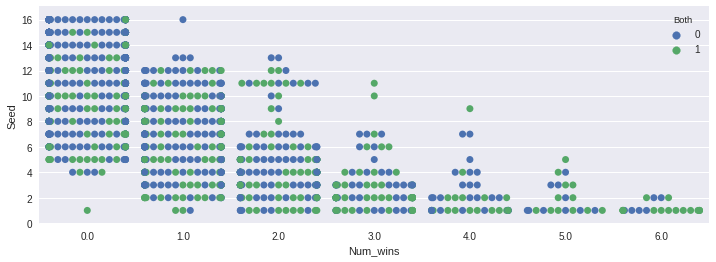

In [172]:
fig, ax = plt.subplots(figsize=(12,4))
sns.swarmplot(ax=ax, x= Wom_w_Men['Num_wins'],
             y = Wom_w_Men['Seed'], hue = Wom_w_Men['Both'], size=7)

### Wins by Season

We want this to be put as a joyplot up by the top groups that discuss the win and win percentage of teams with both=1 and teams with both=0. This is joyplot to show how the wins are broken down by Season.

<Figure size 1280x800 with 0 Axes>

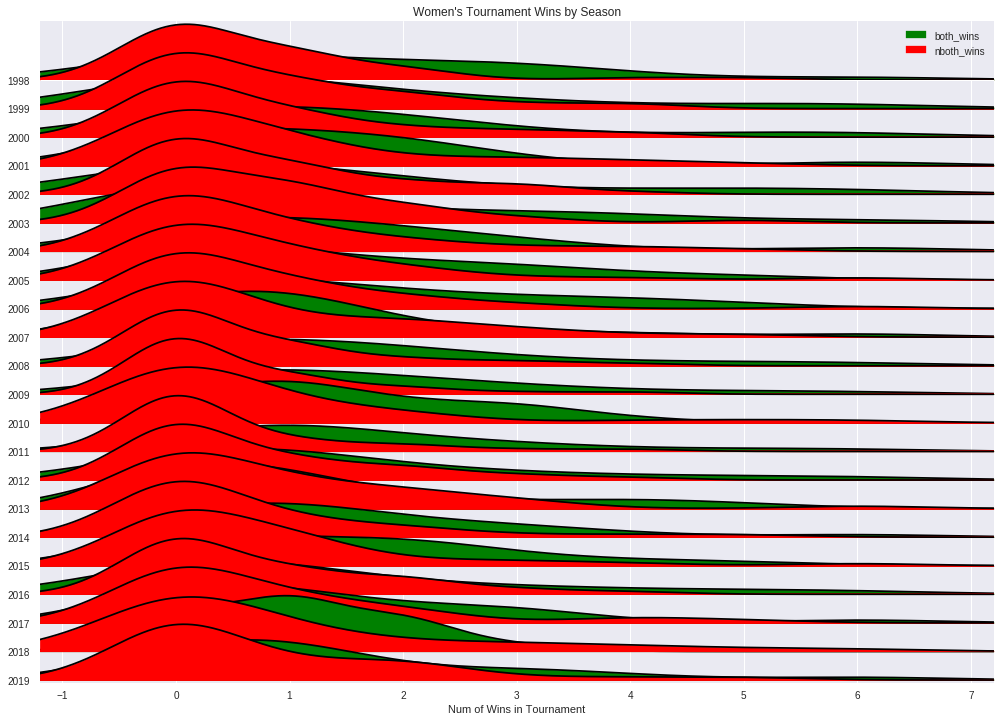

In [173]:
# Women's Joyplot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(W_joy, column=['both_wins', 'nboth_wins'], by="Season", ylim='own', color=['g', 'r'], 
                          figsize=(14,10), grid=True, overlap=1, legend=True, 
                          title = "Women's Tournament Wins by Season")

plt.xlabel('Num of Wins in Tournament')
plt.ylabel('Season')
plt.legend()

Text(0.5, 69.0, 'Num of Wins in Tournament')

<Figure size 1280x800 with 0 Axes>

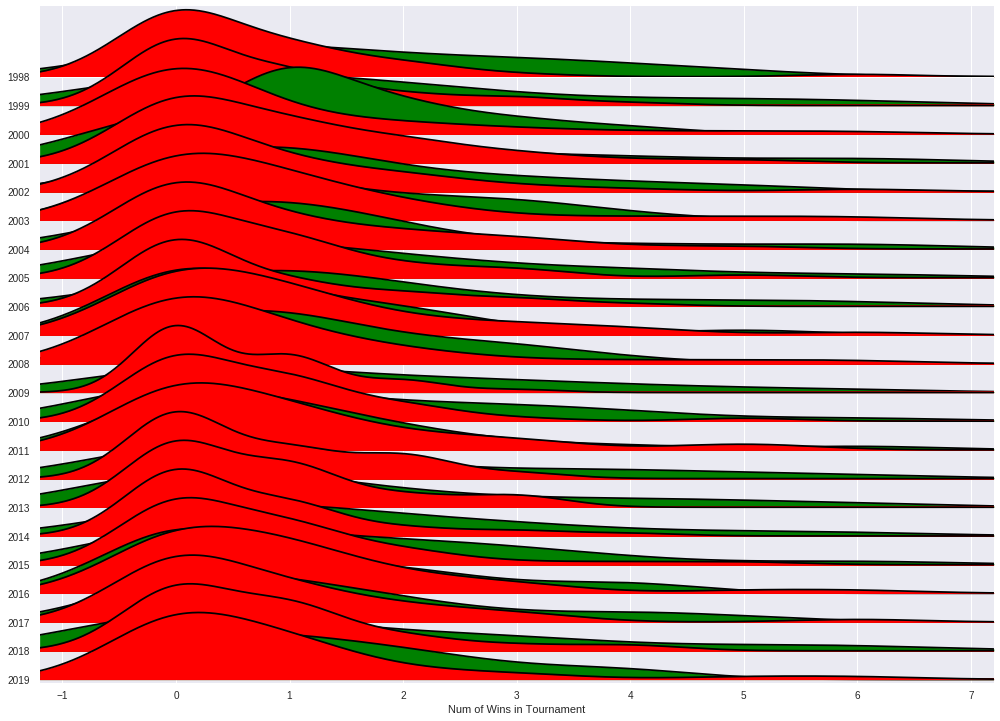

In [174]:
# Men's Joyplot
# men's wins by season
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(M_joy, column=['both_wins', 'nboth_wins'], by="Season", ylim='own', color=['g', 'r'], 
                          figsize=(14,10), grid=True)
plt.ylabel('Season')
plt.xlabel('Num of Wins in Tournament')

Even as broken down by season we can see that programs with both teams in the tournament have a larger distribution of wins in later rounds. 

The plot shows that teams without a counterpart in the tournament consists of more teams entering the tournament that lose in the first or second round.That is why the programs with only one team (the red) have a higher distribution of teams with 0 and 1 wins. Their curve is steep and congregated around a small number of wins.

The plot shows that programs with two teams in the tournament have a flatter curve that is skewed (skewness) further to the right showing that it is more likely to have teams with a higher number of wins in the tournament. 

#### Conference

Make a chart that shows which conferences the teams with both=1 are in. Cool graph, show that this is not a conference indicator

We want to show the distribution of conferences for teams with both=1 and teams with both=0.

In [175]:
# distribution charts like histogram

#### Naive Bayes Classifier

split the data and use naive Bayes to classify each team as the round in which they made it to (lost in). 

Use only variables: TeamName, Seed, PPG, Both

Then find out the importance of each feature, and whether Both has any significance

#### PPG of Teams without Counterpart

In [176]:
# Women
WPPG_c = wppg_0[['Round_Out', 'Num_wins', 'PPG_seas']].groupby(['Round_Out','Num_wins'])['PPG_seas'].mean()
wppg_c = pd.DataFrame(WPPG_c)
wppg_c = wppg_c.sort_values('Num_wins')
wppg_c = wppg_c.reset_index()


# Men
MPPG_c = mppg_0[['Round_Out', 'Num_wins', 'PPG_seas']].groupby(['Round_Out','Num_wins'])['PPG_seas'].mean()
mppg_c = pd.DataFrame(MPPG_c)
mppg_c = mppg_c.sort_values('Num_wins')
mppg_c = mppg_c.reset_index()

In [177]:
wppg_c.head(10)

,Round_Out,Num_wins,PPG_seas
0,First Round,0.0,66.455926
1,Round of 32,1.0,68.084136
2,Sweet Sixteen,2.0,69.091733
3,Elite Eight,3.0,69.036425
4,Final Four,4.0,72.288760
5,Championship,5.0,73.311100
6,Winner,6.0,79.960750


In [178]:
mppg_c.head(10)

,Round_Out,Num_wins,PPG_seas
0,First Round,0.0,70.713348
1,Round of 32,1.0,70.926738
2,Sweet Sixteen,2.0,71.491438
3,Elite Eight,3.0,72.595980
4,Final Four,4.0,70.592071
5,Championship,5.0,73.075375
6,Winner,6.0,74.941611


Strangely the ppg are going up even higher for teams without a counterpart, but we know from our earlier research that teams with a counterpart are more likely to win in almost every round. 

Or maybe its the counterpart that isn't as great a predictor. If points per game is always higher in each round, then that is a predictor of who will win the tournament. This is a crude robust system, but it is fairly accurate. We need to be able to show that programs having a counterpart is also a predictor of winning, and is not too highly correlated with ppg. We need to show that it has value on its own, so if we applied it in a KNN or classification model it would make the model more accurate. 

### Why?

So average ppg is high for the teams in the later rounds whether they have a counterpart or not, but this doesn't who will win in that round. Its strange that as the rounds go on, the number of teams with a counterpart rises and the number of teams without one falls, but both team's ppg keep getting higher as the round goes on. So the teams with no counterpart and high ppg are more likely to make it to later rounds, and the teams with high ppg and a counterpart are more likely to make it to later rounds; but why are there more teams with a counterpart with high ppg. 

I would say teams with a counterpart average higher point per game, but we know that is not true from the graph above, which shows teams with and without counterparts average about the same ppg overall. In general, teams with counterpart average a little more than a point per game greater than teams without counterpart, but their distributions are almost exactly the same, so we know one doesn't have a disproportionately high number of high or low scoring teams. 

This means points per game can tell us that teams with higher ppg are more likely to win (obviously), but it cannot tell us why teams with counterparts are more likely to win. 

### Find number of games where team with lower ppg won

#### Correlation

Find correlation of Seed and PPG to both.
Use correlation matrix and heat map for Seed, PPG, Both, Round_Out

Use moving correlation (two lines on chart) to find the correlation between PPG and percentage wins (when both=1) per round. 

In [179]:
# Creat new dataset for correlation

# Women
WPPG_coef = wppg_1[['Round_Out', 'Num_wins', 'PPG_seas']].groupby(['Round_Out','Num_wins'])['PPG_seas'].mean()
wppg_co = pd.DataFrame(WPPG_coef)
wppg_co = wppg_co.sort_values('Num_wins')
wppg_co = wppg_co.reset_index()


# Men
MPPG_coef = mppg_1[['Round_Out', 'Num_wins', 'PPG_seas']].groupby(['Round_Out','Num_wins'])['PPG_seas'].mean()
mppg_co = pd.DataFrame(MPPG_coef)
mppg_co = mppg_co.sort_values('Num_wins')
mppg_co = mppg_co.reset_index()
#Average the last two rows so we will have correct ppg for teams in championship
#mppg_co.at[5, 'PPG_seas'] = mppg_co['PPG_seas'].iloc[[5, 6]].mean()
# Drop the last row
#mppg_co = mppg_co.drop(6)

In [180]:
mppg_co.head(10)

,Round_Out,Num_wins,PPG_seas
0,First Round,0.0,71.335175
1,Round of 32,1.0,71.921250
2,Sweet Sixteen,2.0,73.908451
3,Elite Eight,3.0,73.892646
4,Final Four,4.0,74.127328
5,Championship,5.0,72.054318
6,Winner,6.0,76.468231


In [181]:
wppg_co.head(10)

,Round_Out,Num_wins,PPG_seas
0,First Round,0.0,66.451211
1,Round of 32,1.0,68.174370
2,Sweet Sixteen,2.0,69.850627
3,Elite Eight,3.0,71.684010
4,Final Four,4.0,72.261789
5,Championship,5.0,71.683375
6,Winner,6.0,76.193156


## ALERT LOOK AT THIS

For the Men the correlation is almost 0. The ppg goes up per round but the win percentage stays about the same, still high. We are looking at it the wrong way. The win percentage shouldn't go up, if it just stays over 50% on average then that means these teams will win. Since there are less teams with a counterpart entering the tournament, the number of teams with a counterpart should be going up per round. So what we need to do is find the correlation of ppg to number of teams w/counterpart per round

In [182]:
# We are using two datasets from before on our graph of teams per round
Perc_WTeams_in_Round.head(10)

,index,Coed Team in Round,Round
1,1,0.35,First Round
1,1,0.45,Round of 32
1,1,0.48,Sweet Sixteen
0,1,0.54,Elite Eight
0,1,0.53,Final Four
0,1,0.64,Championship
0,1,0.73,Tournament Champion


In [183]:
Perc_MTeams_in_Round.head(10)

,index,Coed Team in Round,Round
1,1,0.33,First Round
1,1,0.40,Round of 32
1,1,0.47,Sweet Sixteen
0,1,0.53,Elite Eight
0,1,0.60,Final Four
0,1,0.53,Championship
0,1,0.59,Tournament Champion


In [184]:
# Women's Correlation
xw = wppg_co['PPG_seas']
yw = Perc_WTeams_in_Round['Coed Team in Round']
corco_w = np.corrcoef(xw, yw)

# Men's Correlation
xm = mppg_co['PPG_seas']
ym = Perc_MTeams_in_Round['Coed Team in Round']
corco_m = np.corrcoef(xm, ym)

In [185]:
print(corco_w)

[[1.         0.94357599]
 [0.94357599 1.        ]]


In [186]:
print(corco_m)

[[1.         0.76528616]
 [0.76528616 1.        ]]


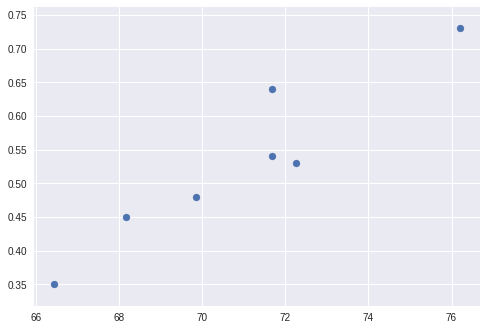

In [187]:
# Women's correlation map
plt.scatter(xw, yw)

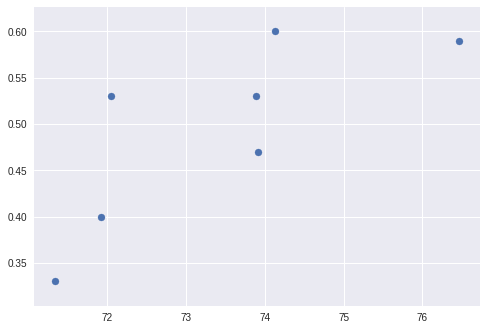

In [188]:
# Men's correlation map
plt.scatter(xm, ym)

### Conclusion
The rise in percentage of teams in each round with a counterpart correlates highly with a rise in ppg of those teams with a counterpart in each round. 

Except for the tournament winner, where the change in ppg is far higher than the increase in teams that win the championshp.

As the rounds when up, so did the average points per game of teams in those rounds (for teams with counterpart)

This could mean that counterpart teams in the tournaement is just a fator of ppg.

#### The real question is why would Teams with both men and women's teams in the tournament have higher PPG than those without. 

So we know that teams with higher ppg win in those teams with a counterpart and those without. It is a constant factor over both, so we know that it is not the reason teams with a counterpart win at a higher percentage than teams without. Now we need to find out why teams with a counterpart win at a higher rate. 

Correlation of Seeds and Teams with both=1
Percentage wins of each type of seed (per round) and Percentage wins of team with 1. 
We will see if they get more correlated as the rounds go up. 

### IMPORTANT
We know that seeds and ppg have high correlations to performance in tournament, but if we can show in the simulation that this gives teams without a high seed and high ppg more accurate probabilities of winning in rounds, then it can be thought of as its own factor.

# Correlation in Performance

Is there a correlation between the men's and women's teams. Meaning if a women's team does well is it likely the men's team will also do well

### Regular Season

### Tournament

## Teams in Tournament whose School only has one gender basketball team

Find out if any of these school's teams even make the tournament, and if they do, how they perform. 

# Monte Carlo Simulation

Looking at simply teams with counterparts and teams without we will run a Monte Carlo simulation for (maybe 100 or 1000) men's and women's tournaments

Each tournament will start with an average range of teams with and without counterparts.
* So for example if on average anywhere from 55-65% of the teams have no counterpart in the tournament then each tournament will be started with one of those numbers of teams with and without
* Then we will use the probabilities of each round to predict how each round of the tournament will look and who is likely to be the winner of the tournament based solely on men's and women's counterparts
* Then we will have the likelihood of teams with and without for each round and the likelihood of the champion having a counterpart for the men's and women's counterpart
* We will graph the entire simulated tournament

The percentage chance of winning will likely be higher in this simulation than in real life, but if we can show it is similar to real life, then we can prove that this is a strong factor in the outcome of the tournament.

# A/B Testing

We should be able to do a/b testing for the accuracy of these different factors. This would be a simple way to show if they addition this factor increased the accuracy of the model. 

Put picture of A/B Test formula

1. We would initially have a control dataset with only the Team Name, Seed, and RoundOut (or outcome in tournament for each team) (maybe also have Season/Year). 
2. We would run a decision tree or Random Forest so the model is explanable and determine the accuracy of this basic model (use evaluation metric from Housing Prices notebook).
3. Then we would add factors that we have tested one at a time to see if they increase the accuracy of the model (Factors: PPG, Both, Conference, etc.). 
4. We would need to make our validation split by seasons and hold it constant (shouldn't be a problem to put random seasons in there becasue this is not really correlated time series data). Then just add in the column for each one of the datasets and run the test and look at the accuracy for each. 
5. Then do a test with all of the features except Both. Then add in Both and see if it increases the accuracy of the model. 

Also just split data and run model for random forest and decision tree using different factors to see if both has relevance at predicting which round they lose in (or win champ if none)

# Probability of Team Winning

Make a dataset from tournament games with each round (winteam and losteam). Make a both column for the winning team and losing team. See how often a team with both teams wins against teams with only one team, and how often it loses to teams with only one team. And how many times they play eachother (two both=1 teams) and what factor decides who wins.

# Feature Importance

See if I can get the feature importance from Random Forest and XGBoost, LightBooost, CatBoost models

# Explanations

Look and see why these schools are successful:
1. School Size
2. Endowment
3. Tournament appearances (men and women)
4. Conference titles
5. 